# Algorytmy ewolucyjne i metaheurystyczne - Heurystyki konstrukcyjne

**Install libs**

!pip install requests
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandoc

**Get data url:**

In [1]:
import requests

target_url_kroa100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA100.tsp"
target_url_krob100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB100.tsp"
target_url_kroa200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA200.tsp"
target_url_krob200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB200.tsp"


def get_file_from_url(target_url):
    file = requests.get(target_url)
    return file.text

**Output test:**

In [2]:
data = get_file_from_url(target_url_krob100)
for line in data.split("\n")[6:-2]:
    print(line.split())

['1', '3140', '1401']
['2', '556', '1056']
['3', '3675', '1522']
['4', '1182', '1853']
['5', '3595', '111']
['6', '962', '1895']
['7', '2030', '1186']
['8', '3507', '1851']
['9', '2642', '1269']
['10', '3438', '901']
['11', '3858', '1472']
['12', '2937', '1568']
['13', '376', '1018']
['14', '839', '1355']
['15', '706', '1925']
['16', '749', '920']
['17', '298', '615']
['18', '694', '552']
['19', '387', '190']
['20', '2801', '695']
['21', '3133', '1143']
['22', '1517', '266']
['23', '1538', '224']
['24', '844', '520']
['25', '2639', '1239']
['26', '3123', '217']
['27', '2489', '1520']
['28', '3834', '1827']
['29', '3417', '1808']
['30', '2938', '543']
['31', '71', '1323']
['32', '3245', '1828']
['33', '731', '1741']
['34', '2312', '1270']
['35', '2426', '1851']
['36', '380', '478']
['37', '2310', '635']
['38', '2830', '775']
['39', '3829', '513']
['40', '3684', '445']
['41', '171', '514']
['42', '627', '1261']
['43', '1490', '1123']
['44', '61', '81']
['45', '422', '542']
['46', '2698',

**Get lat lon from data**

In [3]:
def get_lat_lon_from_url(target_url):
    data = get_file_from_url(target_url)
    list_of_cords = data.split("\n")[6:-2]
    return zip(*[(int(i.split()[1]), int(i.split()[2])) for i in list_of_cords])


**Calculate matrix**

In [4]:
import pandas as pd
import numpy as np
import math


def calc_matrix(lat, lon):
    matrix_size = len(lat)
    matrix = pd.DataFrame(
        np.nan, index=np.arange(matrix_size), columns=np.arange(matrix_size)
    )
    for row in range(matrix.shape[0]):
        for col in range(row, matrix.shape[1]):
            if row == col:
                matrix.iat[row, col] = np.inf
            else:
                matrix.iat[row, col] = matrix.iat[col, row] = round(
                    math.sqrt(
                        ((lat[col] - lat[row]) ** 2) + ((lon[col] - lon[row]) ** 2)
                    )
                )

    return matrix

**Display steps dynamically**

In [5]:
import matplotlib.pyplot as plt


def test_display_dynamically(tedis, distance_matrix, lat, lon):
    from IPython.display import clear_output

    for elem in tedis:
        clear_output(wait=True)
        x, y = [], []
        plt.scatter(lat, lon, color="black")
        for i, vertex in enumerate(elem):
            x.append(lat[vertex])
            y.append(lon[vertex])
            plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
            plt.annotate(i, (lat[vertex], lon[vertex]))
        plt.scatter(lat[elem[0]], lon[elem[0]], color="green", zorder=2)
        plt.plot(x, y, zorder=1)

        path_length = calculate_path_length(elem, distance_matrix)
        plt.figtext(
            1.02,
            0.5,
            "Path length {path_length}".format(path_length=path_length),
            horizontalalignment="center",
            wrap=True,
            fontsize=10,
            bbox={"facecolor": "grey", "alpha": 0.3, "pad": 5},
        )
        plt.pause(0.02)
    plt.show()
    return True

In [6]:
def get_combs(current_tsp):
    return [
        [current_tsp[i], current_tsp[i + 1]] for i, d in enumerate(current_tsp[:-1])
    ]


def calculate_path_length(tsp_final_outcome, distance_matrix):
    return sum(
        [distance_matrix.loc[x, y].sum() for (x, y) in get_combs(tsp_final_outcome)]
    )

**NN Algorithm:**

In [7]:
def get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    neigbrs = distance_matrix.nsmallest(num, idx)
    neigbrs_list = list(neigbrs.index)
    return neigbrs_list

In [8]:
import random


def tsp_nn(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    tsp_outcome = [selected_vertex]
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 1):
        # find minimum in column
        ix_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
        # push min to outcome
        tsp_outcome.append(ix_min)
        test_display.append(tsp_outcome.copy())
        # set distance to 0
        distance_matrix_truncated = distance_matrix_truncated.drop(
            index=selected_vertex, columns=selected_vertex
        )
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
    test_display[-1].append(test_display[-1][0])
    return tsp_outcome, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, tedis_nn= tsp_nn(distance_matrix, 41)



test_display_dynamically(tedis_nn, distance_matrix, lat, lon)

**NN ALG Run:**

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)


for i in range(10):
    tsp, ted = tsp_nn(distance_matrix,selected_vertex = i)
    print(len(tsp))

#test_display_dynamically(ted, distance_matrix,nn=True)

**Greedy Cycle Alg**

In [9]:
import pandas as pd
import numpy as np


def get_index_min_value_in_cols(list_of_cols, distance_matrix):
    distance_matrix_truncated = distance_matrix.drop(list(set(list_of_cols)))
#     display(distance_matrix_truncated)
    min_value_list = distance_matrix_truncated[list_of_cols].min()
#     print("l", min_value_list)
    min_value = min_value_list.min()
#     print("m", min_value)
    min_value_index_in_list = min_value_list.to_list().index(min_value)
#     print("fin", min_value_index_in_list)
    col_index_in_distance_matrix = list_of_cols[min_value_index_in_list]
    ix_min = int(distance_matrix_truncated[col_index_in_distance_matrix].idxmin())
    return ix_min

In [10]:
def get_min_length_to_point(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points


def insert_after_element(current_tsp, elem, value_to_insert):
    elem_index = current_tsp.index(elem)
    current_tsp.insert(elem_index + 1, value_to_insert)
    return current_tsp

In [11]:
import random
import numpy as np


def tsp_greedy(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        # find minimum in current tsp outcome
        ix_min = int(
            get_index_min_value_in_cols(tsp_outcome, distance_matrix_truncated)
        )

        # find suitable place to insert elem
        x, y = get_min_length_to_point(ix_min, tsp_outcome, distance_matrix_truncated)

        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
        test_display.append(tsp_outcome.copy())

    return tsp_outcome, distance_matrix_truncated, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML
lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
%timeit tsp, d,tedis_greedy= tsp_greedy(distance_matrix, 41)



test_display_dynamically(tedis_greedy, distance_matrix, lat, lon)

**Regret ALG**

In [14]:
def get_cost(point, current_tsp, distance_matrix):
    minimal_points = []
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_cost = new_length - x_y_distance
        minimal_points.append((total_cost, x, y, point))
    # sort
    minimal_points.sort(key=lambda x: x[0])
    # 2 regret
    diff = minimal_points[1][0] - minimal_points[0][0]
    x = minimal_points[0][1]
    y = minimal_points[0][2]
    point = minimal_points[0][3]
    regret = (diff, x, y, point)
    return regret

In [15]:
def tsp_regret(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]
    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    closest_points.remove(ix_start_min)
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        regret_scores = []
        for point in closest_points:
            regret_scores.append(get_cost(point, tsp_outcome, distance_matrix))
        regret_scores.sort(key=lambda x: x[0], reverse=True)
        _, x, _, point = regret_scores[0]
        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, point)
        test_display.append(tsp_outcome.copy())
        # delete vertex from closest
        closest_points.remove(point)

    return tsp_outcome, distance_matrix_truncated, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa200)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_regret= tsp_regret(distance_matrix, 47)



test_display_dynamically(tedis_regret, distance_matrix, lat, lon)

import pandas as pd

p = pd.read_csv("kroa2")
print(p.describe())
nn = p.loc[p["REGRET"].isin([10472])]
print(nn)

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)
tsp,d, te = tsp_regret(distance_matrix)
print(len(tsp))
w = list(set(tsp) - set(d.columns))
print("W",w)
t = list(set([i for i in range(0,100)]) - set(tsp))
print("t",len(t))
#x,y = get_plot_points(tsp, lat, lon)

test_display_dynamically(te)

test_display_dynamically(te)

"""
TEST RUN
"""
import random

def create_comparison_table(target_url, name):    
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    final_scores = []
    
    
    vertexes = [i for i  in range(int(len(lat)))]
#     random.shuffle(vertexes)
    #sample of vertexes
#     vertexes = vertexes[:50]
    
    for vertex in vertexes:
        print(type(vertex), vertex)
        tspnn,_  = tsp_nn(distance_matrix,selected_vertex = vertex)
        tspgreedy,_,_  = tsp_greedy(distance_matrix, selected_vertex =  vertex)
        tspregret,_,_  = tsp_regret(distance_matrix, selected_vertex=vertex)
        scores = [calculate_path_length(tspnn, distance_matrix),calculate_path_length(tspgreedy, distance_matrix),calculate_path_length(tspregret, distance_matrix)]
        final_scores.append(scores.copy())
    df = pd.DataFrame(np.array(final_scores),
                       columns=['NN', 'GREEDY', 'REGRET'],
                        index = vertexes)
    display(df)
    df.to_csv(name, index=True) 


create_comparison_table(target_url=target_url_kroa100, name = "kroa2")
create_comparison_table(target_url=target_url_krob100, name = "krob2")

In [16]:
def create_plot(tsp_outcome, lat, lon, title, distance_matrix):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length(tsp_outcome, distance_matrix)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

def test_length_tt():
    lat, lon = get_lat_lon_from_url(target_url_kroa100)
    print(lat[1])
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis = tsp_nn(distance_matrix, 42)
    print(tsp)
    
    #print(calculate_path_length(tsp[:-1], distance_matrix))
    test_display_dynamically(tedis, distance_matrix, lat, lon)
    #print(calculate_path_length(tsp, distance_matrix))
test_length_tt()

import pandas as pd

def prepare(df, index,title1,target_url):
    l = df['Unnamed: 0'].to_list()
    print(l)
    l.sort()
    print(l)
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis,_ = tsp_regret(distance_matrix, l[index])
    create_plot(tsp, lat,lon, title1, distance_matrix)
    
# c = pd.read_csv("kroa2", index_col=False)
# display(c)
# print(c.describe())
# nn = c.loc[c['NN'].isin([11431 ,16586 ])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# print()
# c = pd.read_csv("kroa", index_col=False)      
# nn = c.loc[c['GREEDY'].isin([11838 ,14373])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# print(nn)
# c = pd.read_csv("kroa", index_col=False)
# nn = c.loc[c['REGRET'].isin([10472,13685])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# print(nn)


c = pd.read_csv("krob2", index_col=False)
print(c.describe())
# nn = c.loc[c['NN'].isin([10737 ,17955 ])]
# prepare(nn, 0,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# prepare(nn, 1,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# print()
# print(nn)

# nn = c.loc[c['GREEDY'].isin([11549,15392])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# print(nn)
# print(nn)
# c = pd.read_csv("krob", index_col=False)
# nn = c.loc[c['REGRET'].isin([9694,14198])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# print(nn)


wewnatrz trasowe
1. losuje kolejnosc wierzcholkow
2. iteruje po wierzcholkach
3. permutacje bez powtorzen wszystkie
3. 

przy wymianie krfawedzi: dodane kraw - wziete kraw < 0

In [17]:
from functools import wraps
from time import time


def timing(f):
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = time()
        start_path, stop_path = f(*args, **kwargs)
        end = time()
        diff = end - start
        print("Elapsed time: {}".format(diff))
        return start_path, stop_path, diff

    return wrapper

In [18]:
import random


def create_random_vertexes(number_of_samples):
    l = [int(i) for i in range(0, 100)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


# print(create_random_vertexes(50))

In [19]:
def create_combs(neighs):
    import itertools

    return list(itertools.combinations(neighs, 2))


# print(create_perms([1,2,3]))

In [20]:
def get_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def edge_length(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    swap1_neighs = get_neighs(swap1, path)
    swap2_neighs = get_neighs(swap2, path)
    before_cost = edge_length(swap1, swap1_neighs, distance_matrix) + edge_length(
        swap2, swap2_neighs, distance_matrix
    )
    after_cost = edge_length(swap2, swap1_neighs, distance_matrix) + edge_length(
        swap1, swap2_neighs, distance_matrix
    )
    return after_cost - before_cost


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]

In [21]:
@timing
def inner_vertex_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        possible_moves = create_combs(path)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_items_in_path((swap1, swap2), path)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_greedy(path, distance_matrix2)

start [86, 58, 68, 35, 32, 14, 41, 51, 29, 28, 87, 83, 3, 49, 4, 76, 1, 61, 19, 26, 38, 65, 98, 16, 25, 10, 53, 63, 56, 2, 23, 52, 18, 59, 77, 67, 99, 74, 48, 37, 46, 34, 92, 20, 81, 39, 79, 33, 36, 21]
stop [16, 76, 29, 38, 4, 36, 32, 81, 49, 68, 92, 48, 74, 39, 63, 86, 61, 59, 46, 10, 20, 58, 83, 52, 87, 21, 98, 35, 37, 23, 18, 65, 25, 3, 79, 41, 53, 1, 67, 56, 19, 26, 33, 28, 77, 51, 99, 2, 34, 14]
Elapsed time: 0.4746086597442627


[86, 58, 68, 35, 32, 14, 41, 51, 29, 28, 87, 83, 3, 49, 4, 76, 1, 61, 19, 26, 38, 65, 98, 16, 25, 10, 53, 63, 56, 2, 23, 52, 18, 59, 77, 67, 99, 74, 48, 37, 46, 34, 92, 20, 81, 39, 79, 33, 36, 21]
[86, 58, 68, 35, 32, 14, 41, 51, 29, 28, 87, 83, 3, 49, 4, 76, 1, 61, 19, 26, 38, 65, 98, 16, 25, 10, 53, 63, 56, 2, 23, 52, 18, 59, 77, 67, 99, 74, 48, 37, 46, 34, 92, 20, 81, 39, 79, 33, 36, 21]


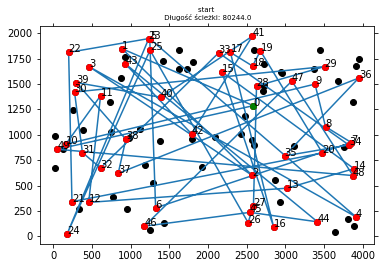

In [22]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[16, 76, 29, 38, 4, 36, 32, 81, 49, 68, 92, 48, 74, 39, 63, 86, 61, 59, 46, 10, 20, 58, 83, 52, 87, 21, 98, 35, 37, 23, 18, 65, 25, 3, 79, 41, 53, 1, 67, 56, 19, 26, 33, 28, 77, 51, 99, 2, 34, 14]
[16, 76, 29, 38, 4, 36, 32, 81, 49, 68, 92, 48, 74, 39, 63, 86, 61, 59, 46, 10, 20, 58, 83, 52, 87, 21, 98, 35, 37, 23, 18, 65, 25, 3, 79, 41, 53, 1, 67, 56, 19, 26, 33, 28, 77, 51, 99, 2, 34, 14]


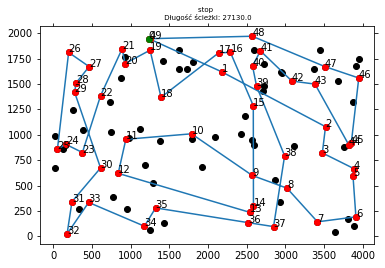

In [23]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [24]:
def find_lowest_cost_inner_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def inner_vertex_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs(path)
        cost, swaps = find_lowest_cost_inner_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_items_in_path((swap1, swap2), path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_steepest(path, distance_matrix2)

Elapsed time: 2.082162380218506


[78, 29, 85, 67, 77, 16, 81, 51, 87, 23, 14, 90, 59, 92, 45, 55, 30, 56, 34, 60, 13, 37, 24, 84, 31, 35, 79, 66, 26, 6, 19, 36, 40, 96, 54, 62, 53, 46, 17, 88, 8, 76, 64, 21, 4, 82, 65, 61, 91, 0]
[78, 29, 85, 67, 77, 16, 81, 51, 87, 23, 14, 90, 59, 92, 45, 55, 30, 56, 34, 60, 13, 37, 24, 84, 31, 35, 79, 66, 26, 6, 19, 36, 40, 96, 54, 62, 53, 46, 17, 88, 8, 76, 64, 21, 4, 82, 65, 61, 91, 0]


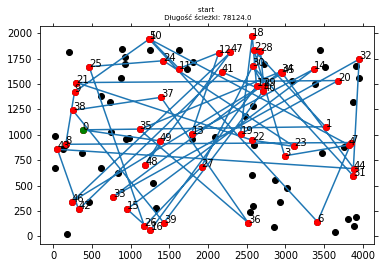

In [25]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[6, 8, 77, 51, 36, 4, 81, 24, 76, 90, 31, 16, 14, 91, 96, 55, 79, 61, 34, 26, 85, 19, 56, 60, 66, 88, 30, 53, 67, 84, 29, 13, 40, 45, 54, 82, 59, 46, 62, 78, 64, 65, 87, 21, 17, 37, 23, 35, 0, 92]
[6, 8, 77, 51, 36, 4, 81, 24, 76, 90, 31, 16, 14, 91, 96, 55, 79, 61, 34, 26, 85, 19, 56, 60, 66, 88, 30, 53, 67, 84, 29, 13, 40, 45, 54, 82, 59, 46, 62, 78, 64, 65, 87, 21, 17, 37, 23, 35, 0, 92]


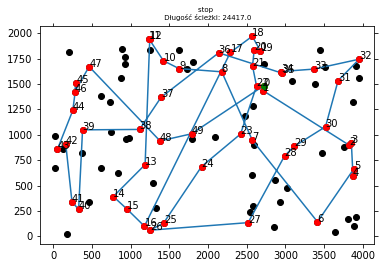

In [26]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [27]:
import itertools
def create_combs_between_two_lists(list1, list2):
    return list(itertools.product(list1, list2))

def calculate_edge_swap_cost_outer(swaps, path, distance_matrix):
    swap1, swap2, = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length(swap1, neighs, distance_matrix)
    after_cost = edge_length(swap2, neighs, distance_matrix)
    return after_cost - before_cost

def swap_item_value_in_list(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    path[index1]= swap2


In [28]:
@timing
def outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost_outer((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_greedy(path, rest, distance_matrix2)

stop [36, 4, 38, 68, 66, 91, 5, 89, 9, 71, 20, 14, 16, 31, 90, 76, 50, 27, 62, 48, 87, 15, 52, 0, 92, 57, 60, 86, 61, 59, 44, 10, 97, 22, 19, 11, 54, 82, 33, 28, 67, 72, 80, 24, 8, 6, 84, 49, 81, 12]
Elapsed time: 0.5629000663757324


[28, 35, 12, 32, 99, 0, 5, 89, 15, 10, 69, 16, 19, 31, 21, 34, 93, 11, 58, 9, 20, 2, 7, 56, 33, 98, 61, 38, 67, 59, 74, 49, 62, 83, 97, 94, 54, 84, 4, 29, 46, 3, 68, 8, 57, 37, 45, 63, 39, 82]
[28, 35, 12, 32, 99, 0, 5, 89, 15, 10, 69, 16, 19, 31, 21, 34, 93, 11, 58, 9, 20, 2, 7, 56, 33, 98, 61, 38, 67, 59, 74, 49, 62, 83, 97, 94, 54, 84, 4, 29, 46, 3, 68, 8, 57, 37, 45, 63, 39, 82]


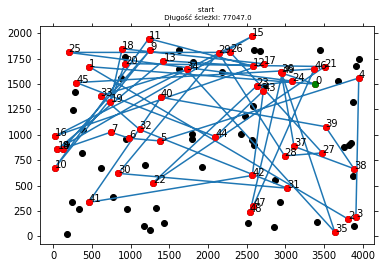

In [29]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[36, 4, 38, 68, 66, 91, 5, 89, 9, 71, 20, 14, 16, 31, 90, 76, 50, 27, 62, 48, 87, 15, 52, 0, 92, 57, 60, 86, 61, 59, 44, 10, 97, 22, 19, 11, 54, 82, 33, 28, 67, 72, 80, 24, 8, 6, 84, 49, 81, 12]
[36, 4, 38, 68, 66, 91, 5, 89, 9, 71, 20, 14, 16, 31, 90, 76, 50, 27, 62, 48, 87, 15, 52, 0, 92, 57, 60, 86, 61, 59, 44, 10, 97, 22, 19, 11, 54, 82, 33, 28, 67, 72, 80, 24, 8, 6, 84, 49, 81, 12]


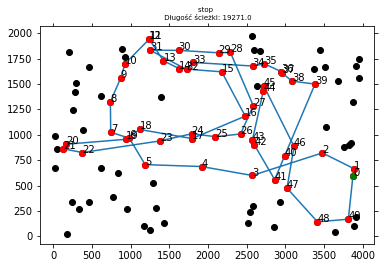

In [30]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [31]:
def edge_length_numpy(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost_outer_numpy(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length_numpy(swap1, neighs, distance_matrix)
    # zwroc after_cost edges
    after_cost = edge_length_numpy(swap2, neighs, distance_matrix)
    return after_cost - before_cost


def find_lowest_cost_outer_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        cost, swaps = find_lowest_cost_outer_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_steepest(path, rest, distance_matrix2)

stop [9, 90, 97, 59, 61, 85, 11, 33, 29, 38, 67, 6, 19, 86, 50, 60, 68, 53, 39, 63, 49, 84, 54, 82, 24, 80, 72, 43, 77, 51, 4, 36, 95, 28, 8, 56, 76, 22, 31, 10, 58, 73, 20, 71, 5, 48, 89, 52, 78, 83]
Elapsed time: 3.523843288421631


[32, 66, 64, 56, 98, 59, 71, 13, 29, 68, 81, 89, 19, 77, 15, 57, 18, 14, 55, 63, 38, 73, 54, 74, 33, 80, 97, 60, 1, 51, 96, 36, 94, 28, 37, 86, 69, 22, 48, 7, 58, 85, 44, 87, 2, 30, 16, 52, 65, 83]
[32, 66, 64, 56, 98, 59, 71, 13, 29, 68, 81, 89, 19, 77, 15, 57, 18, 14, 55, 63, 38, 73, 54, 74, 33, 80, 97, 60, 1, 51, 96, 36, 94, 28, 37, 86, 69, 22, 48, 7, 58, 85, 44, 87, 2, 30, 16, 52, 65, 83]


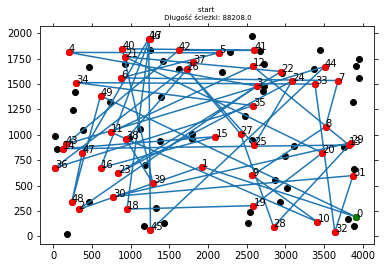

In [32]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[9, 90, 97, 59, 61, 85, 11, 33, 29, 38, 67, 6, 19, 86, 50, 60, 68, 53, 39, 63, 49, 84, 54, 82, 24, 80, 72, 43, 77, 51, 4, 36, 95, 28, 8, 56, 76, 22, 31, 10, 58, 73, 20, 71, 5, 48, 89, 52, 78, 83]
[9, 90, 97, 59, 61, 85, 11, 33, 29, 38, 67, 6, 19, 86, 50, 60, 68, 53, 39, 63, 49, 84, 54, 82, 24, 80, 72, 43, 77, 51, 4, 36, 95, 28, 8, 56, 76, 22, 31, 10, 58, 73, 20, 71, 5, 48, 89, 52, 78, 83]


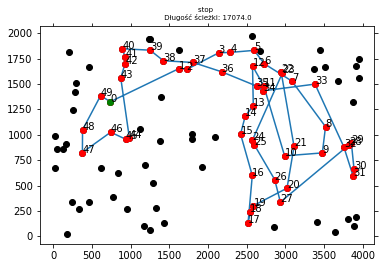

In [33]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [34]:


def edge_length_numpy(point, neigh, dm):
    new_length = dm[point, neigh].sum()
    return new_length


def get_edges(path):
    return [[path[d - 1], vertex] for d, vertex in enumerate(path)]


def get_edges_except(path):
    e = get_edges(path)
    return [
        item
        for item in itertools.combinations(e, 2)
        if len(set(itertools.chain(*item))) == 4
    ]


# print(get_edges([1,2,3]))


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]


def reverse_part_of_list(swap1, swap2, path):
    index_swap1 = path.index(swap1)
    index_swap2 = path.index(swap2)
    ix_min = index_swap1 if index_swap1 < index_swap2 else index_swap2
    ix_max = index_swap1 if index_swap1 > index_swap2 else index_swap2
    path[int(ix_min + 1) : ix_max] = path[int(ix_min + 1) : ix_max][::-1]


def calculate_cost_edge_greedy(edge1, edge2, distance_matrix):
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    # dodaj zwracanie new edges
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, swap1_1, swap2_0


@timing
def inner_edge_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        edges = get_edges_except(path)
        random.shuffle(edges)
        for (edge1, edge2) in edges:
            cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                edge1, edge2, distance_matrix
            )

            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
                break

    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_greedy(path, distance_matrix2)

start [21, 86, 52, 43, 5, 38, 75, 31, 58, 94, 44, 61, 32, 56, 15, 79, 34, 45, 3, 82, 93, 23, 4, 55, 36, 60, 77, 51, 0, 64, 22, 1, 25, 69, 66, 57, 88, 24, 63, 96, 72, 28, 8, 92, 6, 29, 65, 37, 76, 74]
stop [52, 15, 23, 37, 93, 21, 69, 65, 25, 64, 3, 96, 55, 79, 88, 63, 1, 43, 72, 24, 38, 94, 75, 32, 36, 4, 77, 51, 29, 28, 45, 82, 6, 8, 56, 86, 60, 57, 66, 92, 76, 34, 61, 22, 44, 31, 58, 0, 5, 74]
Elapsed time: 0.297072172164917


[21, 86, 52, 43, 5, 38, 75, 31, 58, 94, 44, 61, 32, 56, 15, 79, 34, 45, 3, 82, 93, 23, 4, 55, 36, 60, 77, 51, 0, 64, 22, 1, 25, 69, 66, 57, 88, 24, 63, 96, 72, 28, 8, 92, 6, 29, 65, 37, 76, 74]
[21, 86, 52, 43, 5, 38, 75, 31, 58, 94, 44, 61, 32, 56, 15, 79, 34, 45, 3, 82, 93, 23, 4, 55, 36, 60, 77, 51, 0, 64, 22, 1, 25, 69, 66, 57, 88, 24, 63, 96, 72, 28, 8, 92, 6, 29, 65, 37, 76, 74]


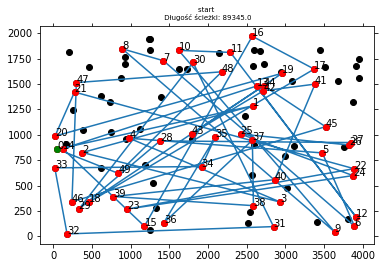

In [35]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[52, 15, 23, 37, 93, 21, 69, 65, 25, 64, 3, 96, 55, 79, 88, 63, 1, 43, 72, 24, 38, 94, 75, 32, 36, 4, 77, 51, 29, 28, 45, 82, 6, 8, 56, 86, 60, 57, 66, 92, 76, 34, 61, 22, 44, 31, 58, 0, 5, 74]
[52, 15, 23, 37, 93, 21, 69, 65, 25, 64, 3, 96, 55, 79, 88, 63, 1, 43, 72, 24, 38, 94, 75, 32, 36, 4, 77, 51, 29, 28, 45, 82, 6, 8, 56, 86, 60, 57, 66, 92, 76, 34, 61, 22, 44, 31, 58, 0, 5, 74]


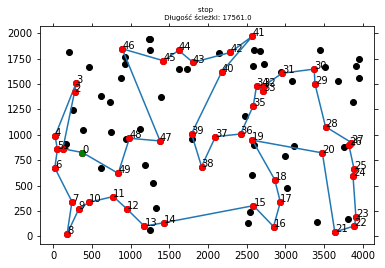

In [36]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [37]:

def find_lowest_cost_edge(edges, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1_1, swap2_0)

    return cost, swaps


@timing
def inner_edge_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        edges = get_edges_except(path)
        cost, (swap1_1, swap2_0) = find_lowest_cost_edge(edges, path, distance_matrix)
        if cost < 0:
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_steepest(path, distance_matrix2)

Elapsed time: 1.253565788269043


[83, 22, 44, 42, 51, 78, 97, 34, 3, 7, 82, 96, 21, 29, 81, 41, 54, 47, 93, 45, 76, 60, 20, 53, 30, 55, 61, 73, 32, 79, 90, 24, 66, 9, 37, 35, 63, 12, 5, 68, 91, 58, 85, 70, 72, 17, 19, 50, 33, 88]
[83, 22, 44, 42, 51, 78, 97, 34, 3, 7, 82, 96, 21, 29, 81, 41, 54, 47, 93, 45, 76, 60, 20, 53, 30, 55, 61, 73, 32, 79, 90, 24, 66, 9, 37, 35, 63, 12, 5, 68, 91, 58, 85, 70, 72, 17, 19, 50, 33, 88]


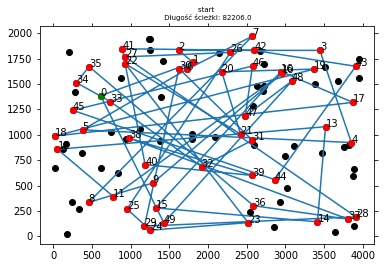

In [38]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[30, 79, 55, 96, 3, 5, 9, 83, 78, 21, 93, 17, 37, 35, 58, 73, 20, 44, 90, 97, 22, 76, 50, 19, 61, 34, 85, 54, 82, 33, 45, 42, 70, 47, 29, 51, 32, 12, 81, 72, 53, 63, 68, 24, 60, 66, 91, 7, 41, 88]
[30, 79, 55, 96, 3, 5, 9, 83, 78, 21, 93, 17, 37, 35, 58, 73, 20, 44, 90, 97, 22, 76, 50, 19, 61, 34, 85, 54, 82, 33, 45, 42, 70, 47, 29, 51, 32, 12, 81, 72, 53, 63, 68, 24, 60, 66, 91, 7, 41, 88]


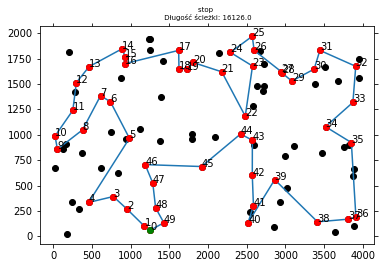

In [39]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [40]:
@timing
def hehe(num):
    for _ in range(num):
        pass
    return [1, 2]


hehe(100000)

Elapsed time: 0.0019383430480957031


(1, 2, 0.0019383430480957031)

In [41]:
# inner_and_outer_vertex_greedy greedy
@timing
def inner_and_outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        all_combined = possible_moves_inner + possible_moves_outer
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves_inner:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
                if cost < 0:
                    swap_items_in_path((swap1, swap2), path)
                    better = True
                    break
            if item in possible_moves_outer:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 4.358970403671265


[48, 7, 38, 27, 31, 57, 23, 33, 81, 35, 4, 71, 79, 68, 29, 22, 30, 20, 62, 87, 89, 88, 64, 76, 26, 83, 37, 94, 59, 74, 42, 3, 60, 69, 19, 53, 86, 82, 50, 70, 28, 90, 84, 58, 44, 56, 45, 41, 9, 21]
[48, 7, 38, 27, 31, 57, 23, 33, 81, 35, 4, 71, 79, 68, 29, 22, 30, 20, 62, 87, 89, 88, 64, 76, 26, 83, 37, 94, 59, 74, 42, 3, 60, 69, 19, 53, 86, 82, 50, 70, 28, 90, 84, 58, 44, 56, 45, 41, 9, 21]


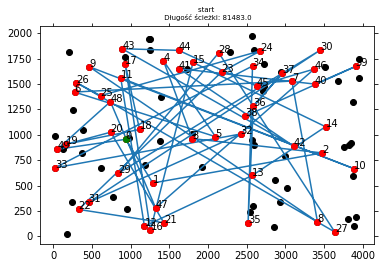

In [42]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[62, 46, 59, 61, 19, 86, 50, 60, 57, 80, 24, 68, 72, 49, 38, 95, 29, 22, 44, 10, 20, 71, 83, 87, 15, 52, 18, 74, 91, 0, 76, 34, 26, 85, 11, 54, 82, 33, 45, 28, 8, 6, 56, 27, 92, 31, 14, 16, 48, 5]
[62, 46, 59, 61, 19, 86, 50, 60, 57, 80, 24, 68, 72, 49, 38, 95, 29, 22, 44, 10, 20, 71, 83, 87, 15, 52, 18, 74, 91, 0, 76, 34, 26, 85, 11, 54, 82, 33, 45, 28, 8, 6, 56, 27, 92, 31, 14, 16, 48, 5]


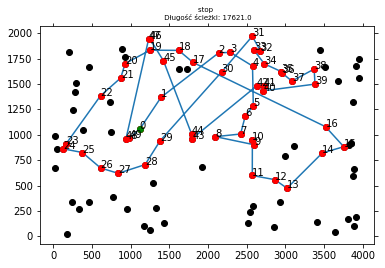

In [43]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs(path)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_items_in_path((swap1, swap2), path)
                better = True
        if choice == 1:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

In [44]:
# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        cost_inner, swaps_inner = find_lowest_cost_inner_steepest(
            possible_moves_inner, path, distance_matrix
        )

        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(
            possible_moves_outer, path, distance_matrix
        )

        if cost_inner < cost_outer and cost_inner < 0:
            swap1, swap2 = swaps_inner
            swap_items_in_path((swap1, swap2), path)
            better = True

        if cost_outer <= cost_inner and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

Elapsed time: 8.969412803649902


[93, 3, 63, 59, 91, 42, 84, 21, 7, 46, 54, 70, 92, 5, 60, 10, 90, 66, 38, 44, 40, 82, 55, 83, 86, 95, 31, 19, 11, 56, 89, 65, 2, 53, 25, 98, 41, 77, 64, 17, 87, 33, 43, 26, 28, 94, 96, 6, 99, 13]
[93, 3, 63, 59, 91, 42, 84, 21, 7, 46, 54, 70, 92, 5, 60, 10, 90, 66, 38, 44, 40, 82, 55, 83, 86, 95, 31, 19, 11, 56, 89, 65, 2, 53, 25, 98, 41, 77, 64, 17, 87, 33, 43, 26, 28, 94, 96, 6, 99, 13]


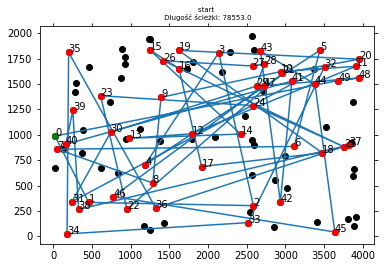

In [45]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[84, 67, 49, 43, 72, 54, 82, 80, 24, 56, 19, 6, 8, 86, 50, 57, 27, 60, 38, 95, 29, 33, 11, 85, 61, 59, 22, 90, 31, 71, 83, 9, 78, 87, 15, 21, 69, 65, 3, 18, 48, 5, 62, 0, 92, 51, 77, 47, 99, 13]
[84, 67, 49, 43, 72, 54, 82, 80, 24, 56, 19, 6, 8, 86, 50, 57, 27, 60, 38, 95, 29, 33, 11, 85, 61, 59, 22, 90, 31, 71, 83, 9, 78, 87, 15, 21, 69, 65, 3, 18, 48, 5, 62, 0, 92, 51, 77, 47, 99, 13]


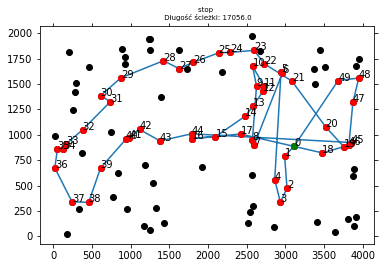

In [46]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
        if choice == 1:
            edges = get_edges_except(path)
            random.shuffle(edges)
            for (edge1, edge2) in edges:
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break
    return start_path, path


print()
e = [([4, 1], [2, 3])]
z = get_edges_except([1, 2, 3, 4])[0]
if (4, 1) in e:
    print(z)
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

In [178]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False

        possible_moves = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)
        all_combined = possible_moves + edges
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
            if item in edges:
                (edge1, edge2) = item
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break

    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 6.374369144439697


[7, 57, 5, 27, 6, 4, 76, 72, 67, 87, 1, 69, 59, 90, 91, 34, 20, 45, 13, 53, 55, 2, 65, 85, 24, 63, 50, 93, 58, 99, 66, 62, 30, 33, 77, 19, 80, 68, 97, 89, 25, 52, 96, 70, 11, 60, 21, 71, 23, 38]
[7, 57, 5, 27, 6, 4, 76, 72, 67, 87, 1, 69, 59, 90, 91, 34, 20, 45, 13, 53, 55, 2, 65, 85, 24, 63, 50, 93, 58, 99, 66, 62, 30, 33, 77, 19, 80, 68, 97, 89, 25, 52, 96, 70, 11, 60, 21, 71, 23, 38]


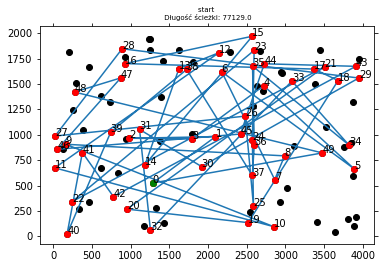

In [48]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[13, 9, 98, 18, 91, 44, 32, 99, 80, 96, 95, 86, 51, 10, 83, 47, 65, 43, 62, 50, 15, 8, 77, 81, 6, 25, 36, 28, 17, 48, 92, 3, 11, 45, 60, 31, 23, 52, 0, 84, 39, 26, 14, 78, 12, 64, 79, 30, 66, 63, 19, 41, 54, 46, 5, 53, 61, 82, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 55, 70, 71, 49, 85, 4, 42, 94, 93, 90, 75, 69, 20, 22, 34, 1, 67, 29, 88, 76, 59, 40, 58, 72, 2, 68, 73, 56, 35]
[13, 9, 98, 18, 91, 44, 32, 99, 80, 96, 95, 86, 51, 10, 83, 47, 65, 43, 62, 50, 15, 8, 77, 81, 6, 25, 36, 28, 17, 48, 92, 3, 11, 45, 60, 31, 23, 52, 0, 84, 39, 26, 14, 78, 12, 64, 79, 30, 66, 63, 19, 41, 54, 46, 5, 53, 61, 82, 74, 21, 7, 16, 24, 89, 33, 57, 97, 87, 27, 38, 37, 55, 70, 71, 49, 85, 4, 42, 94, 93, 90, 75, 69, 20, 22, 34, 1, 67, 29, 88, 76, 59, 40, 58, 72, 2, 68, 73, 56, 35]


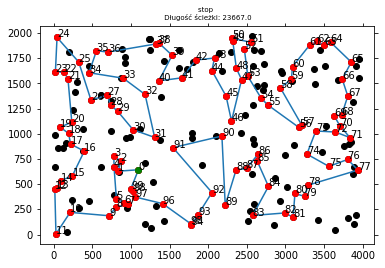

In [179]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [175]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(possible_moves_outer, path, distance_matrix)
        
        edges = get_edges_except(path)
        cost_edges, swaps_edge  = find_lowest_cost_edge(
            edges, path, distance_matrix
        )
            
        if cost_outer < cost_edges and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
            
        if cost_edges <= cost_outer and cost_edges < 0:
            (swap1_1, swap2_0) = swaps_edge
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True
            
    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 6.6193528175354


[58, 40, 88, 20, 22, 34, 1, 67, 29, 79, 76, 59, 3, 92, 11, 39, 26, 12, 64, 30, 46, 5, 53, 74, 82, 61, 49, 90, 69, 75, 93, 94, 85, 4, 42, 55, 37, 70, 71, 38, 27, 87, 97, 57, 33, 89, 24, 16, 7, 21, 41, 54, 19, 63, 66, 78, 14, 84, 0, 52, 23, 31, 60, 25, 6, 81, 77, 8, 15, 50, 62, 43, 36, 28, 45, 17, 48, 18, 98, 91, 65, 47, 83, 10, 51, 86, 95, 96, 80, 44, 32, 99, 73, 56, 35, 9, 13, 68, 2, 72]
[58, 40, 88, 20, 22, 34, 1, 67, 29, 79, 76, 59, 3, 92, 11, 39, 26, 12, 64, 30, 46, 5, 53, 74, 82, 61, 49, 90, 69, 75, 93, 94, 85, 4, 42, 55, 37, 70, 71, 38, 27, 87, 97, 57, 33, 89, 24, 16, 7, 21, 41, 54, 19, 63, 66, 78, 14, 84, 0, 52, 23, 31, 60, 25, 6, 81, 77, 8, 15, 50, 62, 43, 36, 28, 45, 17, 48, 18, 98, 91, 65, 47, 83, 10, 51, 86, 95, 96, 80, 44, 32, 99, 73, 56, 35, 9, 13, 68, 2, 72]


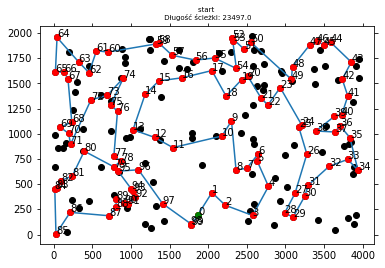

In [177]:
a = create_plot(stop_path, lat, lon, "start", distance_matrix)

[54, 11, 26, 85, 61, 59, 44, 14, 16, 10, 20, 73, 58, 35, 37, 23, 17, 87, 15, 69, 65, 64, 3, 18, 52, 78, 83, 9, 5, 62, 46, 97, 22, 76, 19, 6, 8, 56, 86, 84, 38, 12, 32, 36, 4, 51, 47, 13, 2, 45]
[54, 11, 26, 85, 61, 59, 44, 14, 16, 10, 20, 73, 58, 35, 37, 23, 17, 87, 15, 69, 65, 64, 3, 18, 52, 78, 83, 9, 5, 62, 46, 97, 22, 76, 19, 6, 8, 56, 86, 84, 38, 12, 32, 36, 4, 51, 47, 13, 2, 45]


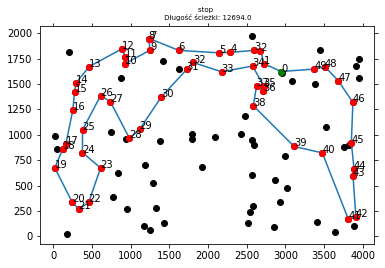

In [52]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [53]:
@timing
def random_solution(path, time, distance_matrix):
    from datetime import datetime, timedelta

    to_return = []
    path_len = 999999999999999
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        full_path = path + [path[0]]
        curr_len = calculate_path_length(full_path, distance_matrix)
        if curr_len < path_len:
            path_len = curr_len
            to_return = path
        random.shuffle(path)

    return to_return, path_len

# with open("paths.txt", "r") as file:
#     data = file.readlines()


# def testtest(program, time, title):
#     final_scores = []

#     for ix, items in enumerate(data):
#         path = [int(item) for item in items.split()]
#         lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
#         distance_matrix = calc_matrix(lat, lon)
#         stop_path, lengh, diff = program(path, time, distance_matrix)
#         final_path = stop_path + [stop_path[0]]
#         path_len = calculate_path_length(final_path, distance_matrix)

#         scores = [diff, path_len, final_path]
#         final_scores.append(scores)
#     df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
#     df["Time"] = df["Time"].astype("float")
#     df["PathLen"] = df["PathLen"].astype("float")
#     df["FinalPath"] = df["FinalPath"].astype("object")
#     display(df)
#     display(df.describe())
#     df.to_csv(title)
#     return True

# testtest(random_solution, 4.61, "randomsolb")
# c = pd.read_csv("randomsolb")
# display(c[c["PathLen"] == c["PathLen"].min()])
# display(c.describe())
with open("paths.txt", "r") as file:
    data = file.readlines()


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


kroa
test(inner_and_outer_vertex_steepest, "test")
test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob")
test(inner_and_outer_vertex_steepest, "inner_and_outer_vertex_steepestkrob")
test(inner_and_outer_vertex_greedy, "inner_and_outer_vertex_greedykrob")
test(outer_vertex_inner_edge_greedy, "outer_vertex_inner_edge_greedykrob")
c = pd.read_csv("inner_and_outer_vertex_greedykrob")


In [170]:
import operator
from itertools import chain

def create_steepest_ranking_outer_vertex(possible_moves_outer, path,rest, distance_matrix):
    ranking = []
    for (swap1, swap2) in possible_moves_outer:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < 0:
            p = get_neighs(swap1, path)
            r = get_neighs(swap2,rest)
            n = [p, r, (swap1, swap2)]
            to_delete = list(set(list(chain(*n))))
            l = ["vertex", (swap1, swap2), current_cost, to_delete]
            ranking.append(l)

    return ranking

def create_steepest_ranking_edge(edges, path, distance_matrix):
    ranking = []
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < 0:
            a = get_neighs(edge1[0], path)
            b = get_neighs(edge1[1], path)
            c = get_neighs(edge2[0], path)
            d = get_neighs(edge2[1], path)
            n = [a,b,c,d]
            to_delete = list(set(list(chain(*n))))
            l = ["edge", (swap1_1, swap2_0), current_cost, to_delete]
            ranking.append(l)

    return ranking


# outer vertex inner edge
@timing
def new_outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    
    whole_ranking = []
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)        
        edges = get_edges_except(path)
        
        existing_moves_vertex = [item[1] for item in whole_ranking if item[0] == "vertex"]
        existing_moves_edge = [item[1] for item in whole_ranking if item[0] == "edge"]
        
        new_possible_moves_outer = [item for item in possible_moves_outer if item not in existing_moves_vertex]
        new_edges = [item for item in edges if item not in existing_moves_edge]
        
        vertex_ranking = create_steepest_ranking_outer_vertex(new_possible_moves_outer, path, rest, distance_matrix)
        edge_ranking = create_steepest_ranking_edge(new_edges, path, distance_matrix)
        
        whole_ranking += vertex_ranking
        whole_ranking += edge_ranking
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(2))   
        
        if len(whole_ranking) > 0:
            _type, swaps, cost, to_delete = whole_ranking[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

            temp = whole_ranking.copy()
            for ix, items in enumerate(whole_ranking):
                for check in items[1]:
                    if check in to_delete:
                        temp.remove(items)
                        break
        
            whole_ranking = temp
        
    return start_path, path


path, rest = create_random_vertexes(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 58.84728717803955


[27, 87, 97, 24, 16, 7, 46, 30, 12, 14, 26, 39, 11, 45, 60, 25, 77, 81, 8, 15, 50, 62, 43, 65, 91, 9, 44, 32, 99, 2, 72, 58, 68, 13, 98, 92, 3, 79, 5, 53, 1, 34, 67, 29, 88, 20, 22, 49, 70, 37]
[27, 87, 97, 24, 16, 7, 46, 30, 12, 14, 26, 39, 11, 45, 60, 25, 77, 81, 8, 15, 50, 62, 43, 65, 91, 9, 44, 32, 99, 2, 72, 58, 68, 13, 98, 92, 3, 79, 5, 53, 1, 34, 67, 29, 88, 20, 22, 49, 70, 37]


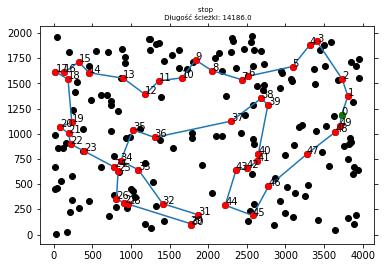

In [55]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 5.275400638580322
[14, 26, 39, 11, 48, 17, 28, 36, 60, 25, 77, 81, 8, 15, 62, 43, 65, 18, 91, 9, 32, 99, 73, 56, 35, 13, 59, 29, 67, 22, 69, 90, 93, 94, 85, 70, 37, 27, 38, 21, 74, 53, 5, 46, 30, 66, 63, 19, 78, 12]
[14, 26, 39, 11, 48, 17, 28, 36, 60, 25, 77, 81, 8, 15, 62, 43, 65, 18, 91, 9, 32, 99, 73, 56, 35, 13, 59, 29, 67, 22, 69, 90, 93, 94, 85, 70, 37, 27, 38, 21, 74, 53, 5, 46, 30, 66, 63, 19, 78, 12]


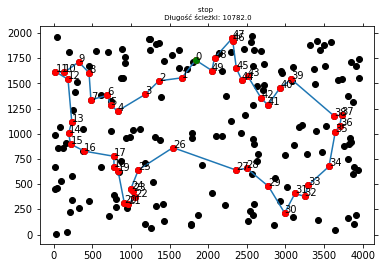

In [56]:
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]


def get_new_edges_after_vertex_swap(swaps, path):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    return [(swap2, neighs[0]), (swap2, neighs[1])]


def get_new_edges_after_edges_swap(swaps):
    edge1, edge2 = swaps
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    return [(swap1_0, swap2_0), (swap1_1, swap2_1)]


@timing
def candidate_moves(path, rest, distance_matrix):
    better = True
    start_path = path.copy()

    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)

        possible_moves_outer_new_edges_created = list(
            itertools.chain(
                *[
                    get_new_edges_after_vertex_swap(item, path)
                    for item in possible_moves_outer
                ]
            )
        )
        edges_new_edges_created = list(
            itertools.chain(*[get_new_edges_after_edges_swap(item) for item in edges])
        )

        candidates = []
        for n1 in range(200):
            for n2 in find_n_closest_neigh(n1, distance_matrix, 5):
                if (n1, n2) in edges_new_edges_created:
                    ix = int(edges_new_edges_created.index((n1, n2)) / 2)
                    e = edges[ix]
                    cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                        e[0], e[1], distance_matrix
                    )
                    if cost < 0:
                        c = ["edge", (swap1_1, swap2_0), cost]
                        candidates.append(c)
                if (n1, n2) in possible_moves_outer_new_edges_created:
                    ix = int(possible_moves_outer_new_edges_created.index((n1, n2)) / 2)
                    e = possible_moves_outer[ix]
                    cost = calculate_edge_swap_cost_outer_numpy(
                        e, path, distance_matrix
                    )
                    if cost < 0:
                        c = ["vertex", e, cost]
                        candidates.append(c)

        candidates = sorted(candidates, key=operator.itemgetter(2))
        if len(candidates) > 0:
            _type, swaps, cost = candidates[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

    return start_path, path


def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = candidate_moves(path, rest, distance_matrix2)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 0.0011200904846191406
[75, 69, 143, 149, 90, 93, 94, 49, 184, 167, 172, 22, 168, 67, 29, 34, 1, 180, 124, 160, 79, 150, 186, 5, 108, 106, 156, 46, 30, 66, 161, 63, 19, 54, 41, 134, 185, 126, 111, 119, 154, 182, 21, 133, 7, 74, 53, 61, 82, 71, 129, 70, 37, 27, 38, 87, 147, 199, 170, 57, 140, 97, 113, 102, 145, 128, 142, 89, 33, 24, 16, 55, 151, 177, 195, 4, 104, 42, 136, 85, 138, 181, 194, 112, 132, 175, 101, 20, 139, 163, 153, 88, 40, 58, 2, 72, 188, 68, 141, 130, 75]
[75, 69, 143, 149, 90, 93, 94, 49, 184, 167, 172, 22, 168, 67, 29, 34, 1, 180, 124, 160, 79, 150, 186, 5, 108, 106, 156, 46, 30, 66, 161, 63, 19, 54, 41, 134, 185, 126, 111, 119, 154, 182, 21, 133, 7, 74, 53, 61, 82, 71, 129, 70, 37, 27, 38, 87, 147, 199, 170, 57, 140, 97, 113, 102, 145, 128, 142, 89, 33, 24, 16, 55, 151, 177, 195, 4, 104, 42, 136, 85, 138, 181, 194, 112, 132, 175, 101, 20, 139, 163, 153, 88, 40, 58, 2, 72, 188, 68, 141, 130, 75]


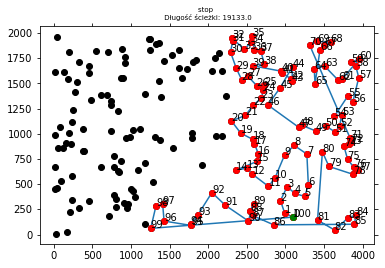

In [99]:
import random

def new_get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    return np.argsort(distance_matrix[:, idx])[:num]

@timing
def new_tsp_nn(d, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 199)

    tsp_outcome = [selected_vertex]
    
    for _ in range(int((d.shape[0] / 2) - 1)):
        
        # find minimum in column
        ix_min = int(np.argmin(d[:,selected_vertex]))
        
        # push min to outcome
        tsp_outcome.append(ix_min)
#         test_display.append(tsp_outcome.copy())
        # set distance to 0
        
        d[:, selected_vertex] = np.inf
        d[selected_vertex] = np.inf
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
#     test_display[-1].append(test_display[-1][0])
    return tsp_outcome, 1

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_tsp_nn(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(start_path, lat, lon, "stop", distance_matrix)


In [ ]:
paths = []
for _ in range(100):
    path, _ = create_random_vertexes2(100)
    if path not in paths:
        paths.append(path)

with open("paths.txt", "w") as file:
    for line in paths[:100]:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")

In [ ]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def testzad1(title):
    final_scores = []

    for _ in range(50):
        lat, lon = get_lat_lon_from_url(target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        d = distance_matrix.to_numpy()
        #         start = time()
        tsp, d, time = new_tsp_nn(d)
        #         end = time()
        #         diff = end - start
        #         print(tsp)
        final_path = tsp
        distance_matrix = calc_matrix(lat, lon)
        #         display(distance_matrix)
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [time, path_len, final_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data[:5]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


# testzad1("new_tsp_nnkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(
#     new_outer_vertex_inner_edge_steepest, "new_outer_vertex_inner_edge_steepestkroa200"
# )
# test(candidate_moves, "candidate_moveskrob200")

In [ ]:
c = pd.read_csv("candidate_moveskrob200")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot(
    p,
    lat,
    lon,
    "Algorytm stromy ruchy kandydackie - krob200",
    distance_matrix,
)

# LAB 4

In [58]:
def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest

In [60]:
#candidate
def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]

def my_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def outer_vertex_swap_cost(swaps, path, distance_matrix):
    current_cost = calculate_edge_swap_cost_outer_numpy(
            swaps, path, distance_matrix
        )
    return current_cost, swaps

def edge_swap_cost_cands(e, distance_matrix):
    edge1 = e[0]
    edge2 = e[1]
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, (swap1_1, swap2_0)

@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = path.copy()
    if shuffle:
        random.shuffle(shuffled_list)
    
    
    for v1 in shuffled_list:
        v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
        moves = []

        for v2 in neigh_info[v1]:            
            if v2 in path:
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            else:
                moves.append(["V", (v1_left_neigh,v2)])
                moves.append(["V", (v1_right_neigh,v2)])
    

        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        print(whole_ranking)
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
        print(whole_ranking[0])
        _type, cost, swaps = whole_ranking[0]
        if cost < 0:
            if _type == "V":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "E":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
            
    return start_path, path
# path, rest = create_random_vertexes2(100)
# lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
# distance_matrix = calc_matrix(lat, lon)
# distance_matrix2 = distance_matrix.to_numpy()
# start_path, stop_path, diff = cands(
# path, rest, distance_matrix2
# )
# distance_matrix = calc_matrix(lat, lon)
# a = create_plot(start_path, lat, lon, "stop", distance_matrix)

p [18, 136, 97, 89, 199, 81, 150, 4, 14, 194, 56, 32, 10, 135, 134, 146, 171, 113, 55, 49, 140, 50, 62, 83, 195, 99, 87, 187, 144, 167, 170, 120, 163, 107, 46, 11, 157, 119, 79, 95, 106, 38, 142, 164, 15, 51, 31, 69, 64, 85, 2, 172, 176, 177, 63, 73, 156, 197, 175, 77, 9, 52, 28, 42, 100, 60, 105, 130, 158, 3, 61, 0, 125, 161, 17, 30, 128, 160, 159, 191, 6, 36, 186, 33, 68, 152, 70, 198, 78, 141, 116, 82, 7, 112, 98, 101, 103, 127, 75, 129]
0 61 125
[['E', ([0, 125], [52, 28])], ['E', ([61, 0], [9, 52])], ['V', (61, 114)], ['V', (125, 114)], ['V', (61, 110)], ['V', (125, 110)], ['E', ([0, 125], [116, 82])], ['E', ([61, 0], [141, 116])], ['V', (61, 131)], ['V', (125, 131)]]
[['V', -3927.0, (125, 131)], ['V', -3818.0, (125, 110)], ['V', -3817.0, (125, 114)], ['V', -2910.0, (61, 131)], ['V', -2873.0, (61, 110)], ['V', -2772.0, (61, 114)], ['E', -1549.0, (125, 52)], ['E', -1530.0, (0, 141)], ['E', -1033.0, (125, 116)], ['E', -947.0, (0, 9)]]
p [18, 136, 97, 89, 199, 81, 150, 4, 14, 194, 56

[['E', ([107, 46], [191, 100])], ['E', ([163, 107], [83, 191])], ['V', (163, 13)], ['V', (46, 13)], ['V', (163, 141)], ['V', (46, 141)], ['E', ([107, 46], [68, 188])], ['E', ([163, 107], [2, 68])], ['E', ([107, 46], [56, 38])], ['E', ([163, 107], [197, 56])]]
[['E', -2859.0, (46, 56)], ['V', -2198.0, (163, 13)], ['V', -1769.0, (163, 141)], ['E', -852.0, (107, 197)], ['E', -648.0, (107, 2)], ['V', -583.0, (46, 13)], ['V', -562.0, (46, 141)], ['E', -412.0, (46, 191)], ['E', 265.0, (46, 68)], ['E', 284.0, (107, 83)]]
p [18, 174, 182, 98, 105, 92, 158, 64, 42, 4, 150, 81, 198, 137, 36, 186, 33, 16, 159, 160, 128, 30, 140, 106, 95, 165, 164, 103, 127, 75, 101, 69, 31, 116, 12, 78, 24, 89, 120, 163, 107, 56, 197, 175, 136, 97, 170, 156, 194, 14, 161, 131, 0, 162, 3, 60, 19, 113, 87, 17, 73, 63, 195, 70, 188, 68, 2, 172, 176, 100, 191, 83, 47, 171, 146, 11, 157, 76, 79, 46, 38, 142, 178, 15, 62, 43, 187, 144, 167, 49, 55, 51, 10, 32, 28, 109, 9, 7, 82, 129]
p [18, 174, 182, 98, 105, 92, 158, 

[18, 174, 9, 109, 28, 165, 164, 19, 161, 12, 78, 191, 83, 47, 148, 162, 3, 197, 36, 137, 8, 81, 46, 38, 92, 171, 131, 116, 31, 69, 101, 75, 127, 157, 76, 79, 56, 107, 29, 168, 100, 176, 159, 16, 33, 186, 93, 194, 14, 60, 115, 187, 43, 62, 15, 178, 65, 105, 98, 182, 154, 64, 158, 120, 89, 146, 11, 103, 113, 95, 32, 10, 51, 55, 49, 167, 172, 149, 128, 102, 140, 106, 57, 170, 97, 136, 42, 63, 195, 70, 188, 4, 73, 17, 7, 82, 129, 68, 2, 150]
[18, 174, 9, 109, 28, 165, 164, 19, 161, 12, 78, 191, 83, 47, 148, 162, 3, 197, 36, 137, 8, 81, 46, 38, 92, 171, 131, 116, 31, 69, 101, 75, 127, 157, 76, 79, 56, 107, 29, 168, 100, 176, 159, 16, 33, 186, 93, 194, 14, 60, 115, 187, 43, 62, 15, 178, 65, 105, 98, 182, 154, 64, 158, 120, 89, 146, 11, 103, 113, 95, 32, 10, 51, 55, 49, 167, 172, 149, 128, 102, 140, 106, 57, 170, 97, 136, 42, 63, 195, 70, 188, 4, 73, 17, 7, 82, 129, 68, 2, 150]


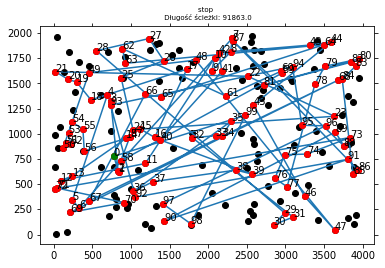

In [61]:
@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
        print("p", path)
        if v1 in path:
            v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
            print(v1, v1_left_neigh, v1_right_neigh)
            for v2 in neigh_info[v1]:            
                if v2 in path:
                    v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                    moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                    moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
                else:
                    moves.append(["V", (v1_left_neigh,v2)])
                    moves.append(["V", (v1_right_neigh,v2)])

            print(moves)
            whole_ranking = []
            for move in moves:
                if move[0] == "V":
                    whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
                if move[0] == "E":
                    whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
            whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
            print(whole_ranking)
            
#             print(whole_ranking[0])
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []
                
#             if v1 not in path:
#                 break
            
    return start_path, path
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

[131, 116, 52, 144, 78, 161, 54, 41, 134, 185, 126, 119, 106, 111, 74, 182, 154, 68, 188, 59, 157, 79, 76, 67, 29, 168, 61, 172, 143, 149, 94, 85, 70, 145, 142, 89, 33, 57, 97, 113, 147, 87, 37, 129, 138, 43, 193, 115, 65, 64, 156, 108, 53, 90, 93, 49, 184, 167, 82, 171, 183, 158, 110, 0, 190, 26, 127, 192, 166, 191, 107, 141, 130, 179, 73, 165, 51, 10, 83, 169, 152, 178, 187, 36, 189, 148, 105, 98, 91, 9, 174, 56, 99, 196, 117, 135, 25, 123, 137, 11]
[131, 116, 52, 144, 78, 161, 54, 41, 134, 185, 126, 119, 106, 111, 74, 182, 154, 68, 188, 59, 157, 79, 76, 67, 29, 168, 61, 172, 143, 149, 94, 85, 70, 145, 142, 89, 33, 57, 97, 113, 147, 87, 37, 129, 138, 43, 193, 115, 65, 64, 156, 108, 53, 90, 93, 49, 184, 167, 82, 171, 183, 158, 110, 0, 190, 26, 127, 192, 166, 191, 107, 141, 130, 179, 73, 165, 51, 10, 83, 169, 152, 178, 187, 36, 189, 148, 105, 98, 91, 9, 174, 56, 99, 196, 117, 135, 25, 123, 137, 11]


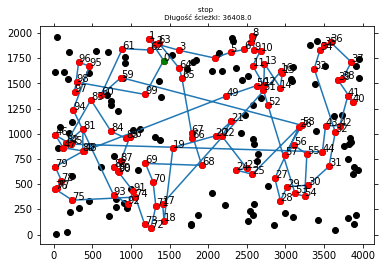

In [90]:
# @timing
def cands_best(path, rest, distance_matrix, n_cands = 10, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
#         print("p", path)
        for v2 in neigh_info[v1]:            
            if v1 in path and v2 in path:
                v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            elif v1 in path or v2 in path:
                v_inpath = v1 if v1 in path else v2
                v_outpath = v1 if v2==v_inpath else v2
                v_left_neigh, v_right_neigh = my_neighs(v_inpath, path)
                moves.append(["V", (v_left_neigh,v_outpath)])
                moves.append(["V", (v_right_neigh,v_outpath)])
            
#         print(moves)
        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
#         print(whole_ranking)

#             print(whole_ranking[0])
        if len(whole_ranking) > 0:
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []

#             if v1 not in path:
#                 break
            
    return start_path, path,_
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands_best(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [63]:
def calculate_path_length_numpy(path, distance_matrix_numpy):
    new_path = path.copy()
    new_path.append(new_path[0])
    return sum([
        edge_length_numpy(x,y,distance_matrix_numpy) for (x,y) in get_combs(new_path)
    ])

19.74819254875183
[18, 105, 148, 189, 48, 45, 120, 23, 135, 60, 137, 123, 178, 65, 152, 43, 115, 50, 187, 121, 130, 179, 155, 99, 32, 44, 35, 56, 73, 188, 2, 139, 20, 153, 163, 172, 149, 143, 101, 75, 94, 151, 177, 27, 87, 170, 57, 89, 142, 133, 154, 53, 5, 156, 186, 129, 70, 37, 55, 195, 85, 138, 49, 34, 29, 168, 64, 176, 78, 12, 122, 84, 110, 116, 114, 0, 144, 159, 66, 46, 108, 106, 74, 124, 160, 76, 157, 192, 59, 191, 13, 165, 10, 83, 47, 118, 9, 98, 174, 91]
[18, 105, 148, 189, 48, 45, 120, 23, 135, 60, 137, 123, 178, 65, 152, 43, 115, 50, 187, 121, 130, 179, 155, 99, 32, 44, 35, 56, 73, 188, 2, 139, 20, 153, 163, 172, 149, 143, 101, 75, 94, 151, 177, 27, 87, 170, 57, 89, 142, 133, 154, 53, 5, 156, 186, 129, 70, 37, 55, 195, 85, 138, 49, 34, 29, 168, 64, 176, 78, 12, 122, 84, 110, 116, 114, 0, 144, 159, 66, 46, 108, 106, 74, 124, 160, 76, 157, 192, 59, 191, 13, 165, 10, 83, 47, 118, 9, 98, 174, 91]


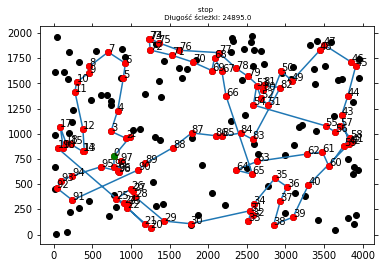

In [64]:
ix, ix_r = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()


def msls(ixxxx, ix_rest, distance_matrix):
    start = time()
    scores = []
    for i in range(100):
#         print(i)
        path = ixxxx.copy()
        rest = ix_rest.copy()
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix, shuffle=True
        )
#         distance_matrix = calc_matrix(lat, lon)
        scores.append([calculate_path_length_numpy(stop_path, distance_matrix), stop_path])
    x = sorted(scores, key=operator.itemgetter(0))
    end = time()
    diff = end - start
    return [1], x[0][1], diff

_, stop_path, diff = msls(ix, ix_r, distance_matrix2)
print(diff)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 10.30442190170288
[122, 144, 84, 0, 52, 114, 116, 173, 120, 171, 109, 17, 28, 183, 135, 60, 123, 137, 8, 117, 62, 43, 187, 115, 121, 169, 83, 165, 164, 103, 196, 44, 32, 155, 99, 56, 35, 174, 9, 91, 98, 105, 3, 100, 59, 166, 40, 88, 139, 153, 163, 67, 1, 180, 124, 160, 34, 168, 22, 172, 167, 184, 61, 82, 71, 129, 70, 195, 177, 151, 55, 37, 38, 27, 147, 87, 97, 113, 102, 142, 24, 16, 7, 182, 154, 106, 108, 5, 186, 156, 119, 185, 41, 54, 19, 63, 161, 159, 78, 14]
[122, 144, 84, 0, 52, 114, 116, 173, 120, 171, 109, 17, 28, 183, 135, 60, 123, 137, 8, 117, 62, 43, 187, 115, 121, 169, 83, 165, 164, 103, 196, 44, 32, 155, 99, 56, 35, 174, 9, 91, 98, 105, 3, 100, 59, 166, 40, 88, 139, 153, 163, 67, 1, 180, 124, 160, 34, 168, 22, 172, 167, 184, 61, 82, 71, 129, 70, 195, 177, 151, 55, 37, 38, 27, 147, 87, 97, 113, 102, 142, 24, 16, 7, 182, 154, 106, 108, 5, 186, 156, 119, 185, 41, 54, 19, 63, 161, 159, 78, 14]


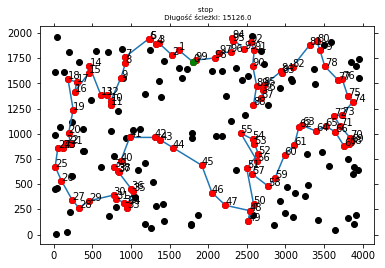

In [65]:
from datetime import datetime, timedelta


def perturbate1(path, rest, no = 4):
    for _ in range(int(no/2)):
        edges = get_edges_except(path)
        (edge1, edge2) = random.choice(edges)
        swap1_1 = edge1[1]
        swap2_0 = edge2[0]
        swap_items_in_path((swap1_1, swap2_0), path)
        reverse_part_of_list(swap1_1, swap2_0, path)
        
        swap1 = random.choice(path)
        swap2 = random.choice(rest)
        swap_item_value_in_list((swap1, swap2), path)
        swap_item_value_in_list((swap2, swap1), rest)

@timing
def ils1(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate1(y, rr)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils1(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]
[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]


([2650,
  2636,
  3113,
  3174,
  3213,
  3394,
  3520,
  3635,
  3729,
  3683,
  3736,
  3853,
  3955,
  3911,
  3808,
  3874,
  3704,
  3646,
  3835,
  3854,
  3822,
  3756,
  3806,
  3875,
  3939,
  3888,
  3564,
  3479,
  3278,
  2991,
  2863,
  3022,
  3297,
  3249,
  3124,
  3099,
  2990,
  2848,
  2936,
  2781,
  2588,
  2576,
  2519,
  2542,
  2573,
  2499,
  2361,
  2599,
  2574,
  2421,
  2178,
  2097,
  2302,
  2232,
  2482,
  2586,
  2687,
  2716,
  2628,
  2433,
  2365,
  2513,
  2576,
  2597,
  2469,
  2290,
  2178,
  2048,
  1724,
  1660,
  1625,
  1393,
  1183,
  1362,
  1424,
  1327,
  1251,
  1234,
  1247,
  1357,
  1533,
  1621,
  1807,
  1838,
  2082,
  2139,
  2318,
  2312,
  2552,
  2573,
  2678,
  2728,
  2721,
  2933,
  2945,
  2961,
  3092,
  3078,
  3085,
  2773,
  2650],
 [802,
  727,
  885,
  1064,
  1085,
  1028,
  1079,
  1174,
  1188,
  1533,
  1542,
  1712,
  1743,
  1673,
  1375,
  1318,
  1082,
  1018,
  963,
  923,
  899,
  882,
  746,
  598,
  640,
 

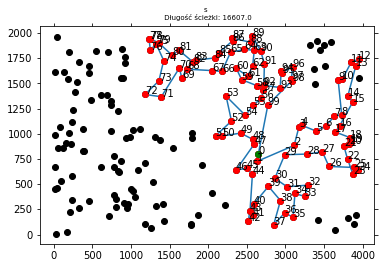

In [67]:
import random
import numpy as np

def find_closest_neigh_not_in_path(neigh, path, distance_matrix):
    for n in np.argsort(distance_matrix[:, neigh]):
        if n not in path:
            return n, distance_matrix[n, neigh]
#     return None

def find_smallest(path, distance_matrix):
    score = 99999999999999
    item_in_path = None
    item_not_in_path = None
    for item in path:
        new_item_not_in_path, new_score = find_closest_neigh_not_in_path(item, path, distance_matrix)
        if new_score < score:
            score = new_score
            item_in_path = item
            item_not_in_path = new_item_not_in_path
    return item_in_path, item_not_in_path

def insert_cost_lowest(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        new_length = edge_length_numpy(point, [x,y], distance_matrix)
        x_y_distance = edge_length_numpy(x,y,distance_matrix)
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points

def tsp_greedy_repair(tsp_outcome, distance_matrix):
    tsp_outcome.append(tsp_outcome[0])
    while len(tsp_outcome) < 101:
        _,ix_min = find_smallest(tsp_outcome, distance_matrix)
        x, y = insert_cost_lowest(ix_min, tsp_outcome, distance_matrix)
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
    return tsp_outcome[:-1]

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(distance_matrix)
# find_closest_neigh_not_in_path(1, [4,5,6], distance_matrix2)
# edge_length_numpy(1, [2], distance_matrix2)

# find_smallest([1,2,3], distance_matrix2)
t = tsp_greedy_repair([1,67,21], distance_matrix2)
distance_matrix = calc_matrix(lat, lon)
create_plot(t, lat, lon, "s", distance_matrix)

In [ ]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2B(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2B(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [ ]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2A(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
#         _,y,_ = cands_best(y,rr,distance_matrix)
        
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return start_path, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2A(
path, rest, distance_matrix2,time=4
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [ ]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def aemmmmmmm4(title, program):
    final_scores = []
    for ix, items in enumerate(data[:10]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(200)]) - set(path))
        print(ix, path)
        print("p", len(path))
        print("r", len(rest))
        
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        
        start = time()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        end = time()
        diff = end - start
        
        distance_matrix = calc_matrix(lat, lon)
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path, start_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath","Num"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    df["Num"] = df["Num"].astype("float")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
# aemmmmmmm4("ilsssssss2BBB1krob", ils2B)

In [123]:
def create_plot_numpy(tsp_outcome, lat, lon, title, distance_matrix, ndm):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length_numpy(tsp_outcome, ndm)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

In [ ]:
c = pd.read_csv("msls")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
ndm = distance_matrix.to_numpy()
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot_numpy(
    p,
    lat,
    lon,
    "Algorytm MSLS - krob200",
    distance_matrix,
    ndm
)

21.233757257461548
[102, 145, 16, 142, 89, 182, 154, 133, 61, 82, 106, 108, 156, 186, 150, 103, 164, 165, 169, 121, 115, 43, 107, 68, 58, 40, 2, 72, 188, 141, 73, 13, 191, 162, 92, 105, 189, 178, 183, 171, 17, 28, 109, 123, 77, 117, 36, 8, 137, 198, 25, 135, 60, 120, 11, 146, 3, 100, 131, 116, 114, 52, 110, 99, 155, 44, 32, 56, 35, 174, 98, 159, 54, 185, 126, 111, 119, 66, 161, 176, 157, 76, 29, 67, 168, 1, 34, 22, 172, 143, 149, 167, 184, 55, 177, 195, 37, 27, 113, 97]
[102, 145, 16, 142, 89, 182, 154, 133, 61, 82, 106, 108, 156, 186, 150, 103, 164, 165, 169, 121, 115, 43, 107, 68, 58, 40, 2, 72, 188, 141, 73, 13, 191, 162, 92, 105, 189, 178, 183, 171, 17, 28, 109, 123, 77, 117, 36, 8, 137, 198, 25, 135, 60, 120, 11, 146, 3, 100, 131, 116, 114, 52, 110, 99, 155, 44, 32, 56, 35, 174, 98, 159, 54, 185, 126, 111, 119, 66, 161, 176, 157, 76, 29, 67, 168, 1, 34, 22, 172, 143, 149, 167, 184, 55, 177, 195, 37, 27, 113, 97]


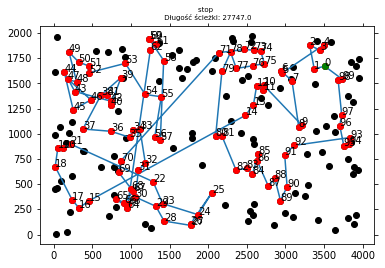

In [68]:
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()


def newmsls(distance_matrix):
    start = time()
    scores = []
    for i in range(100):
#         print(i)
        path, rest = create_random_vertexes2(100)
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix)
#         distance_matrix = calc_matrix(lat, lon)
        scores.append([calculate_path_length_numpy(stop_path, distance_matrix), stop_path])
    x = sorted(scores, key=operator.itemgetter(0))
    end = time()
    diff = end - start
    return [1], x[0][1], diff

_, stop_path, diff = newmsls(distance_matrix2)
print(diff)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 0.0009968280792236328
Elapsed time: 0.0009968280792236328
Elapsed time: 0.0009961128234863281
Elapsed time: 0.0019953250885009766
Elapsed time: 0.0010232925415039062
Elapsed time: 0.0009717941284179688
Elapsed time: 0.001004934310913086
Elapsed time: 0.0
Elapsed time: 0.0010247230529785156
Elapsed time: 0.000997304916381836
Elapsed time: 0.0009992122650146484
Elapsed time: 0.0
Elapsed time: 0.0
Elapsed time: 0.0009980201721191406
Elapsed time: 0.001024484634399414
Elapsed time: 0.0
Elapsed time: 0.0010247230529785156
Elapsed time: 0.0009968280792236328
Elapsed time: 0.0009694099426269531
Elapsed time: 0.0
edges 23
pre [46, 30, 63, 19, 126, 111, 1, 34, 41, 134, 78, 159, 168, 2, 72, 119, 185, 54, 124, 180, 67, 160, 66, 12, 161, 29]
pre [46, 30, 63, 19, 126, 111, 154, 182, 7, 21, 133, 74, 106, 108, 5, 53, 82, 61, 129, 38, 27, 113, 97, 87, 147, 37, 55, 151, 177, 42, 136, 104, 4, 195, 70, 85, 138, 71, 184, 49, 167, 1, 34, 156, 41, 134, 78, 159, 14, 122, 197, 144, 84, 0, 114, 1

pre [47, 169, 73, 141, 130, 153, 20, 139, 1, 34, 188, 68, 31, 23, 164, 165, 77, 81, 178, 179, 103, 121, 115, 51, 10, 56, 163, 171, 25, 135, 2, 72, 35, 152, 187, 60, 117, 123, 168, 99, 32, 96, 45, 120, 158, 173, 79, 150, 186, 30, 66, 46, 119, 185, 54, 63, 41, 134, 126, 111, 156, 106, 108, 5, 53, 124, 180, 67, 160, 40, 58, 44, 196, 15, 65, 80, 101, 143, 69, 75, 90, 93, 94, 149, 172, 22, 95, 125, 198, 50, 193, 83, 62, 88, 155, 43, 86, 29, 8, 137, 47]
61408.0
edges 76
pre [47, 169, 63, 19, 141, 130, 1, 34, 188, 68, 31, 23, 164, 165, 77, 81, 179, 105, 92, 103, 121, 115, 51, 10, 41, 134, 78, 159, 25, 135, 168, 2, 72, 187, 117, 123, 60, 99, 32, 45, 171, 96, 28, 109, 158, 173, 17, 48, 189, 148, 185, 54, 124, 180, 67, 160, 40, 58, 44, 196, 15, 80, 120, 95, 125, 198, 83, 62, 88, 155, 43, 12, 29, 161, 86, 8, 137, 162]
pre [47, 169, 63, 19, 141, 130, 1, 34, 188, 68, 31, 23, 183, 164, 165, 77, 81, 178, 35, 56, 179, 105, 92, 103, 121, 115, 51, 10, 41, 134, 78, 159, 25, 135, 168, 2, 72, 73, 187, 117,

pre [47, 169, 100, 59, 1, 34, 150, 186, 53, 5, 108, 106, 156, 111, 126, 134, 41, 54, 185, 119, 46, 30, 66, 31, 23, 183, 164, 165, 77, 81, 178, 35, 56, 73, 130, 179, 105, 92, 103, 121, 115, 162, 3, 51, 10, 192, 157, 127, 25, 135, 60, 187, 168, 2, 72, 117, 123, 45, 171, 99, 32, 96, 28, 109, 158, 173, 17, 48, 189, 148, 79, 160, 124, 180, 67, 76, 44, 196, 15, 36, 120, 80, 40, 58, 95, 125, 198, 50, 83, 62, 152, 155, 43, 65, 88, 29, 86, 193, 8, 137, 47]
57345.0
edges 75
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 105, 92, 77, 81, 192, 157, 179, 103, 164, 162, 3, 165, 51, 10, 127, 121, 76, 79, 25, 135, 60, 115, 187, 168, 2, 72, 117, 123, 45, 171, 28, 109, 17, 48, 158, 173, 189, 148, 96, 65, 152, 160, 124, 180, 67, 91, 9, 40, 58, 15, 120, 44, 196, 80, 95, 125, 198, 83, 62, 43, 88, 32, 29, 174, 86, 8, 137]
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 31, 23, 105, 92, 77, 81, 183, 192, 157, 179, 155, 103, 164, 162, 3, 98, 165, 51, 10, 118, 127, 121, 76, 79, 25, 135, 60, 115, 187

pre [2, 72, 88, 153, 139, 20, 163, 22, 143, 101, 69, 75, 90, 93, 94, 149, 172, 167, 49, 104, 42, 136, 4, 195, 177, 151, 55, 70, 37, 147, 87, 97, 113, 27, 38, 129, 71, 82, 61, 184, 34, 168, 180, 1, 40, 58, 67, 29, 197, 26, 122, 14, 84, 144, 78, 159, 19, 63, 161, 66, 30, 46, 119, 185, 54, 41, 134, 126, 111, 154, 182, 7, 21, 133, 74, 156, 106, 108, 5, 53, 186, 150, 124, 160, 157, 76, 146, 11, 39, 131, 52, 110, 116, 114, 0, 190, 12, 176, 64, 79, 2]
21185.0
edges 52
pre [47, 169, 100, 59, 141, 130, 1, 34, 188, 68, 164, 165, 192, 157, 179, 103, 162, 3, 51, 10, 127, 76, 79, 168, 2, 72, 99, 32, 96, 28, 109, 17, 48, 189, 148, 124, 180, 67, 160, 40, 58, 44, 196, 80, 95, 125, 83, 135, 60, 88, 155, 29, 86, 105, 92]
pre [47, 169, 178, 100, 59, 141, 130, 1, 34, 188, 68, 164, 165, 192, 157, 179, 103, 162, 3, 51, 10, 127, 76, 79, 168, 2, 72, 99, 32, 96, 28, 109, 17, 48, 189, 148, 150, 186, 30, 66, 46, 119, 185, 54, 63, 19, 41, 134, 126, 111, 156, 106, 108, 5, 53, 124, 180, 67, 160, 40, 58, 56, 35, 44,

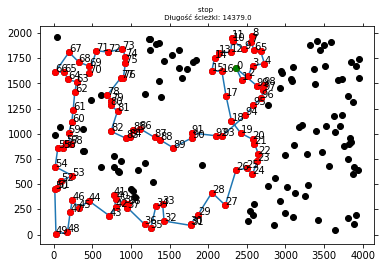

In [169]:
def new_get_combs(current_tsp):
    return [
        (current_tsp[i], current_tsp[i + 1]) for i, d in enumerate(current_tsp[:-1])
    ]

def greedy_recombine(tsp_outcome, distance_matrix, size=100):
    tsp_outcome.append(tsp_outcome[0])
    while len(tsp_outcome) < size + 1:
        _,ix_min = find_smallest(tsp_outcome, distance_matrix)
        x, y = insert_cost_lowest(ix_min, tsp_outcome, distance_matrix)
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
    return tsp_outcome[:-1]


def flatten_edges(edges):
    print("edges", len(edges))
    if len(edges) == 0:
        return []
    path = list(sum(edges, ()))
    indexes = np.unique(path, return_index=True)[1]
    path = [path[index] for index in sorted(indexes)]
#     if path[-1] != path[0]:
#         path.append(path[0])
    return path
    
def recombine(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    child = list(set(parent1_edges).intersection(parent2_edges))
#     child = [edges for edges in parent1_edges if edges not in parent2_edges]
    
#     child =  np.setdiff1d(parent1_edges,parent2_edges)
    child = flatten_edges(child)
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    
    print("pre", child)
    final =  greedy_recombine(child, distance_matrix)
    print("pre", child)
    
    return final
    
@timing
def steadystate(distance_matrix, population_size=20, time=10):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
#         v = [vertex]
        dmmm = np.copy(distance_matrix)
        stop_path,_, _ = new_tsp_nn( 
        dmmm, selected_vertex=vertex
        )
#         stop_path = greedy_recombine(v, distance_matrix)
        population.append(stop_path[:-1])
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine(p1, p2, distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

Elapsed time: 0.0009653568267822266
[98, 18, 91, 9, 174, 35, 56, 73, 99, 155, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 121, 115, 187, 43, 62, 15, 117, 123, 137, 8, 77, 81, 198, 25, 135, 60, 31, 23, 158, 173, 120, 45, 171, 28, 109, 17, 48, 189, 148, 105, 92, 162, 3, 100, 59, 127, 192, 157, 76, 79, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 107, 191, 13, 118, 65, 152, 178, 50, 193, 36, 183, 11, 146, 39, 131, 84, 98]
Elapsed time: 0.0010113716125488281
[135, 60, 25, 198, 77, 8, 137, 123, 117, 15, 62, 187, 115, 121, 193, 50, 43, 152, 65, 178, 36, 183, 28, 109, 17, 48, 189, 148, 105, 92, 162, 3, 100, 59, 127, 192, 157, 76, 79, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 118, 91, 9, 174, 98, 18, 13, 191, 107, 56, 35, 73, 166, 150, 186, 5, 108, 106, 156, 46, 30, 66, 161, 63, 19, 135]
Elapsed time: 0.0009834766387939453

c 100
172793.0
c 100
156893.0
c 100
134217.0
c 100
176799.0
c 100
142010.0
c 100
172776.0
c 100
166723.0
c 100
147682.0
c 100
162556.0
c 100
179632.0
c 100
135491.0
c 100
110353.0
c 100
138722.0
c 100
173135.0
c 100
147931.0
c 100
151359.0
c 100
149981.0
c 100
141326.0
c 100
144844.0
c 100
167028.0
c 100
158569.0
c 100
161477.0
c 100
171487.0
c 100
146270.0
c 100
135027.0
c 100
138002.0
c 100
128383.0
c 100
155239.0
c 100
138762.0
c 100
167656.0
c 100
135837.0
c 100
141551.0
c 100
157786.0
c 100
137847.0
c 100
121497.0
c 100
154201.0
c 100
135341.0
c 100
138972.0
c 100
171156.0
c 100
142464.0
c 100
128600.0
c 100
171982.0
c 100
153289.0
c 100
180443.0
c 100
170298.0
c 100
165381.0
c 100
149928.0
c 100
127140.0
c 100
156028.0
c 100
130953.0
c 100
154918.0
c 100
138242.0
c 100
166790.0
c 100
148857.0
c 100
167698.0
c 100
141579.0
c 100
170173.0
c 100
146780.0
c 100
131543.0
c 100
152505.0
c 100
133363.0
c 100
183963.0
c 100
141551.0
c 100
132411.0
c 100
141757.0
c 100
129180.0
c 100
1186

c 100
130896.0
c 100
131142.0
c 100
118154.0
c 100
147434.0
c 100
155178.0
c 100
122191.0
c 100
182091.0
c 100
115427.0
c 100
153508.0
c 100
145440.0
c 100
155924.0
c 100
177831.0
c 100
141074.0
c 100
141150.0
c 100
163165.0
c 100
134118.0
c 100
162288.0
c 100
162328.0
c 100
142416.0
c 100
129907.0
c 100
123004.0
c 100
134053.0
c 100
149864.0
c 100
122829.0
c 100
162690.0
c 100
178717.0
c 100
135121.0
c 100
166301.0
c 100
129667.0
c 100
141697.0
c 100
110278.0
c 100
149827.0
c 100
153961.0
c 100
172330.0
c 100
151666.0
c 100
111822.0
c 100
147680.0
c 100
151818.0
c 100
169280.0
c 100
138402.0
c 100
120574.0
c 100
142237.0
c 100
137886.0
c 100
115361.0
c 100
157777.0
c 100
127684.0
c 100
134339.0
c 100
126610.0
c 100
121596.0
c 100
146182.0
c 100
153671.0
c 100
120583.0
c 100
136251.0
c 100
168734.0
c 100
174188.0
c 100
162992.0
c 100
182205.0
c 100
168836.0
c 100
139737.0
c 100
133981.0
c 100
149911.0
c 100
133998.0
c 100
143645.0
c 100
145884.0
c 100
136433.0
c 100
142585.0
c 100
1674

[66, 30, 46, 119, 111, 126, 185, 41, 134, 54, 63, 19, 161, 159, 78, 12, 176, 64, 79, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 121, 115, 187, 43, 62, 15, 117, 123, 137, 8, 77, 81, 198, 25, 135, 60, 31, 23, 158, 173, 120, 45, 171, 28, 109, 17, 48, 189, 148, 105, 92, 162, 3, 100, 59, 127, 192, 157, 76, 150, 186, 5, 108, 106, 156]


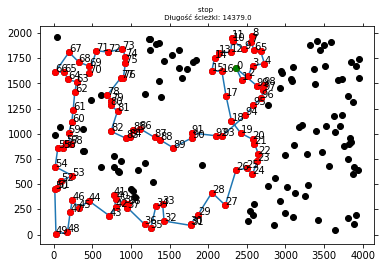

In [153]:
def recombine2(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    child = list(set(parent1_edges).intersection(parent2_edges))
#     child =  np.setdiff1d(parent1_edges,parent2_edges) if pl1 > pl2 else  np.setdiff1d(parent2_edges,parent1_edges)
    child = flatten_edges(child)
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    
    child_edges = new_get_combs(child)
    p1_rest = list(set(parent1_edges) - set(child_edges))
    p2_rest = list(set(parent2_edges) - set(child_edges))
    p_rest = p1_rest + p2_rest
    
    
    while len(child) < len(distance_matrix) / 2:
        for item in p_rest:
            if item not in child:
                insert_after_element(child, random.choice(child), item)
                break
        random.shuffle(p_rest)
    print("c", len(child))
    return child
    
@timing
def steadystate2(distance_matrix, population_size=20, time=10):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
#         v = [vertex]
        dmmm = np.copy(distance_matrix)
        stop_path,_, _ = new_tsp_nn( 
        dmmm, selected_vertex=vertex
        )
#         stop_path = greedy_recombine(v, distance_matrix)
        print(stop_path)
        population.append(stop_path[:-1])
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    print(path_lengths)
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine2(p1, p2, distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate2(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

In [192]:
def recombine3(parent1, parent2, distance_matrix):
    parent1.append(parent1[0])
    parent2.append(parent2[0])
    
    pl1 = calculate_path_length_numpy(parent1, distance_matrix)
    pl2 = calculate_path_length_numpy(parent2, distance_matrix)
    
    parent1_edges = new_get_combs(parent1)
    parent2_edges = new_get_combs(parent2)
    
    if pl1 < pl2:
        primary_parent = parent1
        secondary_parent = parent2
    else:
        primary_parent = parent2
        secondary_parent = parent1
        
    primary_edges = new_get_combs(primary_parent)
    secondary_edges = new_get_combs(secondary_parent)
    
    child = [pe for pe in primary_edges if pe in secondary_edges]
    child = flatten_edges(child)
    
    if len(child) == 0:
        x = random.choice(range(len(distance_matrix)))
        child = [x]
    return final
    
@timing
def steadystate3(distance_matrix, population_size=20, time=100):
    population  = []
    v = random.choices(range(200), k=population_size)
    for vertex in v:
        path, rest = create_random_vertexes2(100)
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix
        )
        population.append(stop_path)
    
    path_lengths = [calculate_path_length_numpy(p,distance_matrix) for p in population]
    print(path_lengths)
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        parent1, parent2 = random.sample(population, 2)
        p1 = parent1.copy()
        p2 = parent2.copy()
        
        child = recombine(p1, p2, distance_matrix)
        _, child,_ = outer_vertex_inner_edge_steepest(child, list(set([i for i in range(200)]) - set(child)), distance_matrix)
        child_length = calculate_path_length_numpy(child, distance_matrix)
        max_path_length = max(path_lengths)
        print(child_length)
        if child_length < max_path_length:
            max_index = path_lengths.index(max_path_length)
            population[max_index] = child
            path_lengths[max_index] = child_length
        
    return [], population[path_lengths.index(min(path_lengths))]

lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
_, stop_path, diff = steadystate3(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot_numpy(stop_path, lat, lon, "stop", distance_matrix, distance_matrix2)

[34289.0, 31581.0, 34845.0, 35259.0, 37990.0, 34043.0, 35223.0, 29435.0, 34944.0, 29922.0, 30416.0, 37137.0, 29939.0, 35684.0, 37131.0, 34144.0, 34288.0, 34596.0, 30656.0, 41324.0]
edges 5
pre [90, 94, 151, 4, 143, 154, 182, 190, 144]
pre [90, 94, 49, 138, 71, 129, 70, 37, 38, 27, 113, 97, 128, 145, 142, 102, 57, 140, 170, 199, 87, 147, 195, 177, 55, 151, 4, 104, 42, 136, 85, 93, 75, 69, 101, 143, 22, 167, 184, 61, 82, 74, 133, 21, 7, 154, 182, 106, 108, 53, 5, 186, 156, 111, 126, 134, 41, 54, 185, 119, 46, 30, 66, 161, 63, 19, 159, 78, 14, 122, 197, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 26, 12, 176, 157, 76, 79, 150, 160, 124, 180, 1, 34, 67, 29, 168, 172, 149, 90]


KeyboardInterrupt: 

In [193]:
def piupiu(title):
    final_scores = []
    for _ in range(10):
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()

        
        start = time()
        _, stop_path, diff = steadystate3(distance_matrix2, time=100)
        end = time()
        diff = end - start
        
        distance_matrix = calc_matrix(lat, lon)
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
piupiu("lab5krob")

[30983.0, 33407.0, 33638.0, 32407.0, 32786.0, 33840.0, 32572.0, 31645.0, 31789.0, 29709.0, 31976.0, 32495.0, 36078.0, 35550.0, 31366.0, 45038.0, 30652.0, 37509.0, 30056.0, 29156.0]
edges 4
pre [122, 20, 110, 188, 167, 132, 180, 133]
pre [122, 20, 67, 110, 193, 131, 4, 196, 66, 116, 39, 38, 197, 69, 148, 52, 169, 189, 188, 9, 141, 94, 0, 89, 97, 106, 173, 11, 160, 70, 60, 34, 171, 156, 73, 164, 59, 185, 195, 42, 163, 49, 158, 76, 152, 54, 103, 142, 176, 170, 87, 22, 21, 192, 143, 159, 23, 17, 104, 102, 182, 139, 105, 117, 184, 88, 86, 113, 167, 132, 65, 144, 198, 130, 177, 56, 93, 179, 175, 26, 151, 37, 19, 79, 180, 29, 74, 100, 55, 99, 61, 25, 149, 68, 133, 48, 85, 137, 165, 107, 122]
Elapsed time: 6.552459478378296
15936.0
edges 6
pre [8, 24, 49, 158, 29, 74, 141, 122, 159, 143, 85, 137]
pre [8, 24, 51, 115, 163, 49, 158, 76, 152, 23, 17, 104, 102, 182, 139, 105, 117, 184, 88, 42, 195, 185, 59, 86, 113, 167, 132, 65, 144, 198, 130, 164, 73, 162, 53, 29, 74, 180, 133, 48, 149, 100, 55,

Elapsed time: 4.063140392303467
16754.0
edges 12
pre [100, 149, 179, 26, 59, 164, 125, 186, 151, 145, 133, 48, 173, 160, 91, 118, 27, 157, 128, 162, 114, 92]
pre [100, 149, 74, 29, 180, 79, 19, 179, 175, 26, 93, 73, 59, 164, 63, 13, 124, 119, 41, 109, 47, 155, 194, 30, 62, 125, 186, 12, 154, 77, 1, 108, 115, 151, 145, 37, 133, 48, 85, 137, 165, 107, 20, 173, 160, 8, 153, 190, 176, 142, 161, 136, 18, 150, 129, 199, 101, 91, 118, 95, 35, 147, 40, 191, 16, 44, 51, 56, 60, 156, 171, 34, 70, 11, 97, 135, 28, 7, 98, 96, 27, 157, 128, 90, 94, 0, 45, 24, 162, 53, 114, 89, 2, 10, 92, 68, 61, 25, 99, 55, 100]
Elapsed time: 11.184231042861938
15969.0
edges 4
pre [184, 117, 176, 190, 166, 31, 186, 77]
pre [184, 117, 49, 142, 176, 190, 153, 162, 53, 93, 179, 175, 26, 174, 58, 135, 75, 96, 157, 2, 10, 84, 72, 121, 92, 27, 128, 90, 98, 7, 28, 166, 31, 60, 34, 171, 156, 130, 198, 177, 73, 164, 144, 65, 132, 167, 113, 86, 59, 51, 115, 195, 185, 42, 88, 163, 158, 139, 105, 13, 63, 124, 119, 1, 108, 41, 

Elapsed time: 4.217024803161621
16036.0
edges 13
pre [118, 95, 63, 119, 133, 74, 165, 151, 181, 106, 123, 112, 9, 188, 184, 139, 173, 160, 41, 108, 137, 85, 55, 99, 163, 49]
pre [118, 91, 101, 199, 129, 150, 18, 136, 95, 35, 44, 16, 40, 191, 77, 154, 12, 186, 125, 30, 194, 155, 47, 62, 1, 109, 63, 119, 117, 36, 79, 180, 133, 74, 29, 165, 151, 181, 82, 106, 97, 11, 94, 0, 89, 20, 37, 19, 123, 187, 78, 178, 80, 112, 68, 67, 9, 188, 189, 38, 39, 116, 110, 122, 107, 184, 105, 139, 158, 173, 160, 70, 13, 124, 41, 108, 182, 71, 137, 85, 48, 149, 25, 61, 55, 99, 100, 126, 64, 140, 183, 163, 49, 102, 76, 104, 152, 23, 17, 161, 118]
Elapsed time: 13.85360050201416
16608.0
edges 9
pre [104, 23, 121, 84, 180, 48, 191, 16, 35, 108, 12, 39, 116, 173, 160, 137]
pre [104, 23, 152, 159, 143, 192, 103, 21, 170, 87, 151, 107, 122, 121, 84, 72, 110, 67, 85, 180, 48, 79, 54, 76, 17, 161, 95, 118, 136, 18, 150, 129, 199, 91, 101, 147, 40, 191, 16, 35, 44, 77, 1, 108, 109, 47, 155, 194, 30, 62, 125, 186, 12

Elapsed time: 3.409595012664795
16759.0
edges 1
pre [24, 145]
pre [24, 8, 45, 89, 160, 26, 56, 93, 179, 175, 60, 177, 130, 198, 144, 65, 132, 167, 113, 86, 88, 184, 42, 195, 185, 59, 164, 73, 156, 171, 34, 70, 106, 11, 173, 97, 174, 58, 135, 75, 96, 157, 2, 10, 84, 72, 121, 92, 27, 128, 90, 98, 7, 28, 166, 31, 0, 94, 141, 122, 9, 188, 189, 169, 52, 148, 69, 197, 38, 39, 116, 66, 196, 4, 131, 193, 110, 67, 20, 107, 165, 85, 48, 137, 133, 68, 149, 25, 61, 99, 55, 100, 74, 29, 180, 79, 19, 37, 151, 145, 24]
Elapsed time: 4.74727463722229
15791.0
edges 5
pre [95, 161, 53, 51, 104, 76, 41, 108, 157, 121]
pre [95, 136, 118, 91, 101, 199, 43, 129, 150, 18, 161, 159, 143, 192, 103, 21, 22, 170, 87, 176, 162, 53, 51, 115, 163, 184, 49, 158, 105, 139, 182, 102, 104, 76, 77, 154, 12, 186, 125, 62, 30, 194, 155, 47, 120, 146, 127, 111, 14, 32, 81, 41, 109, 108, 1, 119, 124, 13, 63, 117, 88, 42, 195, 185, 59, 164, 73, 2, 28, 135, 31, 166, 174, 58, 75, 7, 98, 96, 90, 128, 27, 157, 10, 92, 121, 84, 7

Elapsed time: 11.704369306564331
16971.0
edges 5
pre [170, 142, 34, 171, 135, 58, 153, 162, 195, 124]
pre [170, 21, 22, 87, 142, 176, 115, 51, 59, 86, 113, 167, 132, 65, 144, 198, 130, 177, 164, 73, 56, 93, 179, 175, 60, 34, 156, 171, 166, 28, 7, 98, 2, 10, 84, 121, 92, 157, 27, 128, 90, 96, 75, 135, 58, 174, 31, 26, 53, 190, 153, 162, 195, 185, 88, 42, 163, 184, 117, 63, 13, 124, 119, 41, 81, 32, 14, 111, 127, 146, 120, 109, 108, 1, 62, 47, 155, 194, 30, 125, 186, 12, 154, 77, 182, 105, 139, 158, 49, 102, 76, 104, 17, 23, 152, 159, 54, 143, 192, 103, 170]
Elapsed time: 6.866102695465088
17091.0
edges 9
pre [62, 30, 179, 177, 173, 11, 47, 120, 184, 105, 126, 123, 107, 45, 103, 54]
pre [62, 30, 108, 1, 117, 56, 93, 179, 177, 175, 26, 160, 173, 89, 20, 0, 94, 97, 11, 70, 60, 34, 171, 156, 130, 198, 13, 63, 109, 47, 194, 155, 120, 81, 41, 119, 124, 184, 105, 139, 182, 158, 49, 163, 36, 183, 140, 64, 187, 78, 178, 80, 112, 126, 123, 100, 55, 99, 61, 25, 149, 68, 74, 29, 180, 133, 79, 19, 3

Elapsed time: 11.72214961051941
18155.0
edges 3
pre [151, 145, 182, 139, 55, 99]
pre [151, 145, 45, 24, 8, 33, 56, 51, 115, 195, 185, 86, 113, 167, 132, 65, 144, 198, 156, 171, 34, 60, 26, 175, 179, 93, 130, 177, 73, 164, 59, 42, 88, 184, 117, 158, 105, 182, 139, 102, 15, 124, 13, 63, 119, 41, 109, 108, 1, 62, 47, 30, 125, 186, 12, 154, 77, 104, 17, 23, 159, 143, 192, 21, 22, 87, 170, 103, 54, 152, 76, 49, 163, 142, 176, 138, 172, 190, 153, 162, 53, 37, 19, 79, 100, 55, 99, 61, 25, 149, 68, 74, 29, 133, 180, 48, 85, 137, 165, 107, 151]
Elapsed time: 3.2140727043151855
16943.0
edges 2
pre [8, 24, 56, 93]
pre [8, 45, 107, 165, 85, 48, 137, 133, 68, 149, 25, 61, 99, 55, 100, 74, 29, 180, 79, 19, 37, 151, 145, 24, 33, 56, 93, 179, 175, 60, 177, 130, 198, 144, 65, 132, 167, 113, 86, 88, 184, 117, 105, 139, 182, 102, 15, 124, 13, 63, 119, 41, 109, 108, 1, 62, 47, 30, 125, 186, 12, 154, 77, 104, 17, 23, 159, 143, 192, 21, 22, 87, 170, 172, 138, 190, 153, 53, 162, 51, 115, 176, 142, 103, 54, 1

Elapsed time: 5.669369459152222
17103.0
edges 14
pre [49, 158, 105, 139, 43, 101, 199, 129, 163, 107, 151, 145, 45, 79, 19, 16, 191, 18, 150, 159, 143, 161, 95, 192, 137, 165]
pre [49, 158, 117, 105, 139, 182, 102, 76, 104, 44, 35, 118, 43, 101, 199, 129, 136, 23, 163, 162, 53, 107, 151, 145, 45, 8, 24, 79, 19, 190, 153, 176, 142, 103, 54, 152, 17, 16, 191, 40, 147, 91, 18, 150, 134, 159, 143, 161, 95, 192, 22, 21, 170, 87, 138, 172, 37, 180, 29, 74, 100, 55, 99, 61, 25, 149, 68, 133, 137, 48, 85, 165, 51, 115, 195, 185, 86, 113, 167, 132, 65, 144, 198, 156, 171, 34, 60, 26, 175, 179, 93, 56, 130, 177, 73, 164, 59, 42, 88, 184, 49]
Elapsed time: 8.241164207458496
15919.0
edges 8
pre [53, 162, 51, 195, 119, 41, 194, 155, 1, 77, 108, 47, 17, 104]
pre [53, 162, 115, 51, 168, 57, 83, 6, 195, 185, 59, 73, 164, 177, 130, 56, 33, 93, 179, 175, 26, 60, 34, 171, 156, 198, 144, 65, 132, 167, 113, 86, 88, 42, 184, 117, 63, 13, 124, 119, 41, 109, 194, 50, 155, 120, 146, 127, 111, 14, 32, 81, 1, 44

Elapsed time: 3.5088248252868652
16558.0
edges 5
pre [123, 126, 119, 181, 168, 33, 84, 121, 165, 85]
pre [123, 126, 112, 80, 178, 78, 187, 64, 46, 140, 183, 36, 71, 15, 77, 154, 12, 186, 125, 30, 194, 50, 155, 47, 62, 1, 108, 109, 120, 146, 127, 111, 14, 32, 81, 41, 119, 124, 13, 63, 181, 82, 5, 3, 168, 33, 151, 107, 20, 89, 70, 160, 173, 11, 106, 97, 0, 94, 2, 28, 135, 31, 166, 174, 58, 75, 7, 98, 96, 90, 128, 27, 157, 10, 92, 84, 121, 72, 9, 110, 67, 122, 165, 137, 85, 48, 133, 180, 29, 68, 149, 25, 61, 99, 55, 100, 74, 37, 19, 79, 123]
Elapsed time: 6.015350580215454
18866.0
edges 11
pre [164, 73, 26, 34, 155, 194, 135, 75, 172, 190, 188, 67, 139, 105, 13, 108, 98, 60, 186, 125]
pre [164, 73, 93, 179, 26, 34, 113, 155, 194, 30, 47, 63, 167, 132, 65, 144, 156, 171, 166, 135, 75, 58, 172, 138, 190, 153, 122, 9, 188, 189, 169, 52, 148, 69, 197, 38, 39, 116, 66, 196, 4, 131, 193, 110, 67, 53, 162, 51, 115, 176, 142, 163, 49, 158, 76, 152, 54, 103, 170, 87, 22, 21, 192, 143, 159, 23, 17,

Elapsed time: 5.104386329650879
16314.0
edges 7
pre [36, 114, 180, 29, 163, 184, 159, 152, 119, 124, 158, 49, 162, 53]
pre [36, 114, 71, 37, 19, 79, 180, 151, 107, 165, 137, 85, 48, 133, 29, 74, 68, 149, 25, 61, 99, 55, 100, 126, 123, 46, 178, 80, 112, 78, 187, 64, 140, 183, 190, 153, 176, 142, 163, 184, 102, 54, 103, 170, 87, 22, 21, 192, 143, 159, 152, 23, 17, 104, 76, 77, 154, 12, 186, 125, 30, 194, 155, 47, 62, 1, 108, 109, 120, 146, 127, 111, 14, 32, 81, 41, 119, 124, 63, 13, 117, 105, 182, 139, 158, 49, 88, 42, 59, 164, 73, 132, 167, 113, 185, 195, 115, 51, 162, 53, 36]
Elapsed time: 4.305434465408325
16369.0
edges 4
pre [58, 135, 174, 166, 85, 48, 53, 153]
pre [58, 135, 174, 166, 31, 97, 173, 107, 165, 85, 48, 137, 133, 68, 149, 25, 61, 99, 55, 100, 74, 29, 180, 79, 19, 37, 151, 53, 162, 153, 190, 138, 172, 87, 22, 21, 170, 103, 192, 159, 17, 104, 182, 105, 139, 117, 184, 158, 49, 102, 76, 23, 152, 143, 54, 142, 176, 163, 88, 42, 59, 164, 73, 177, 130, 60, 34, 171, 156, 198, 144

Elapsed time: 2.7898142337799072
17290.0
edges 53
pre [63, 13, 159, 23, 179, 93, 76, 104, 186, 125, 139, 182, 155, 47, 117, 184, 195, 42, 88, 59, 185, 176, 163, 81, 41, 120, 146, 144, 198, 102, 132, 65, 105, 30, 194, 143, 26, 175, 54, 103, 86, 113, 142, 158, 32, 167, 192, 34, 60, 127, 111, 124, 49, 152, 17, 14, 156, 171, 164, 73, 109, 119]
pre [63, 13, 159, 23, 179, 93, 76, 104, 44, 35, 118, 136, 18, 150, 91, 16, 40, 191, 77, 154, 186, 125, 12, 139, 182, 155, 50, 47, 117, 184, 195, 42, 88, 59, 185, 176, 163, 81, 41, 120, 146, 144, 198, 102, 132, 65, 105, 108, 62, 30, 194, 1, 143, 190, 153, 162, 53, 168, 33, 26, 175, 51, 115, 54, 103, 86, 113, 142, 158, 32, 167, 192, 22, 21, 170, 87, 138, 172, 57, 83, 6, 56, 34, 60, 130, 127, 111, 124, 49, 152, 17, 15, 14, 156, 171, 177, 164, 73, 109, 119, 63]
Elapsed time: 10.91564154624939
16655.0
Elapsed time: 112.86865544319153
[30728.0, 37171.0, 33341.0, 29519.0, 30387.0, 33374.0, 37699.0, 36862.0, 41410.0, 33889.0, 35805.0, 39481.0, 32865.0, 33014

Elapsed time: 12.820547819137573
16427.0
edges 4
pre [130, 177, 103, 54, 143, 192, 162, 53]
pre [130, 177, 73, 164, 59, 6, 83, 57, 168, 51, 115, 163, 176, 142, 103, 54, 143, 152, 23, 76, 102, 49, 158, 184, 117, 139, 105, 182, 15, 124, 13, 63, 119, 41, 81, 32, 14, 111, 127, 146, 120, 109, 108, 1, 62, 47, 155, 50, 194, 30, 125, 186, 12, 154, 77, 191, 40, 16, 91, 18, 150, 136, 118, 35, 44, 104, 17, 159, 192, 22, 21, 170, 87, 172, 138, 190, 153, 162, 53, 42, 195, 185, 88, 86, 113, 167, 132, 65, 144, 198, 156, 171, 34, 60, 26, 175, 179, 93, 33, 56, 130]
Elapsed time: 3.946237087249756
17157.0
edges 5
pre [184, 42, 112, 78, 167, 113, 190, 176, 170, 21]
pre [184, 42, 162, 53, 138, 172, 183, 140, 64, 46, 178, 80, 112, 78, 187, 123, 126, 36, 71, 57, 33, 56, 59, 164, 73, 177, 130, 93, 179, 175, 26, 60, 34, 171, 156, 198, 144, 65, 132, 167, 113, 86, 88, 185, 195, 51, 115, 153, 190, 176, 142, 170, 87, 22, 21, 103, 192, 143, 54, 163, 49, 158, 76, 152, 159, 23, 17, 104, 77, 154, 12, 186, 125, 30, 19

<ipython-input-193-2f3fc881bfb5>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])


,Time,PathLen,FinalPath
0,111.169526,15360.0,"[175, 179, 93, 56, 73, 164, 59, 185, 195, 42, ..."
1,105.095078,15055.0,"[60, 34, 156, 171, 106, 174, 166, 58, 135, 28,..."
2,108.035337,16036.0,"[86, 113, 167, 132, 65, 144, 198, 177, 130, 15..."
3,103.227652,15002.0,"[60, 70, 160, 11, 106, 97, 173, 94, 0, 89, 20,..."
4,103.307379,15712.0,"[158, 184, 42, 195, 185, 59, 164, 73, 177, 56,..."
5,104.329997,15786.0,"[63, 13, 124, 119, 41, 108, 109, 120, 155, 50,..."
6,116.558570,15258.0,"[117, 105, 139, 182, 15, 1, 108, 41, 119, 124,..."
7,106.130165,15121.0,"[11, 173, 97, 94, 0, 89, 20, 45, 8, 24, 145, 1..."
8,112.868655,15756.0,"[133, 29, 74, 100, 55, 99, 61, 25, 149, 68, 48..."
9,105.958163,15228.0,"[71, 19, 79, 29, 74, 100, 55, 99, 25, 149, 68,..."


,Time,PathLen
count,10.000000,10.000000
mean,107.668052,15431.400000
std,4.475452,361.221754
min,103.227652,15002.000000
25%,104.521268,15147.750000
50%,106.044164,15309.000000
75%,110.385979,15745.000000
max,116.558570,16036.000000


       Unnamed: 0        Time       PathLen
count    10.00000   10.000000     10.000000
mean      4.50000  107.310718  15135.800000
std       3.02765    2.036960    561.545051
min       0.00000  103.978449  14738.000000
25%       2.25000  106.451448  14846.750000
50%       4.50000  107.231676  14982.000000
75%       6.75000  107.808333  15200.250000
max       9.00000  110.557866  16636.000000
   Unnamed: 0        Time  PathLen  \
0           0  106.773043  14738.0   

                                           FinalPath  
0  [141, 9, 67, 110, 188, 189, 116, 39, 38, 169, ...  

[141, 9, 67, 110, 188, 189, 116, 39, 38, 169, 52, 148, 69, 197, 66, 196, 4, 131, 193, 61, 68, 149, 25, 99, 55, 100, 74, 29, 79, 19, 37, 180, 133, 48, 85, 137, 165, 107, 151, 145, 45, 24, 8, 33, 26, 175, 179, 93, 56, 73, 164, 59, 185, 195, 42, 184, 88, 86, 113, 167, 132, 65, 144, 198, 177, 130, 156, 171, 34, 60, 70, 160, 11, 173, 97, 31, 166, 174, 58, 135, 75, 96, 90, 128, 27, 157, 10, 92, 121, 72, 84, 2, 7, 98, 2

([3535,
  3438,
  3370,
  3452,
  3642,
  3599,
  3600,
  3684,
  3829,
  3868,
  3896,
  3935,
  3938,
  3946,
  3821,
  3766,
  3595,
  3538,
  3503,
  3292,
  3162,
  3062,
  3123,
  3060,
  3017,
  2995,
  2929,
  2938,
  2800,
  2801,
  2830,
  2944,
  2993,
  3084,
  3084,
  3060,
  3023,
  2982,
  2901,
  2740,
  2698,
  2639,
  2642,
  2312,
  2489,
  2356,
  2221,
  2191,
  2132,
  1794,
  1768,
  1729,
  1699,
  1677,
  1490,
  1264,
  1423,
  1526,
  1623,
  1632,
  1646,
  1697,
  1787,
  1994,
  2028,
  2050,
  2214,
  2374,
  2426,
  2408,
  2741,
  2834,
  2937,
  3007,
  3114,
  3245,
  3248,
  3220,
  3317,
  3373,
  3453,
  3611,
  3782,
  3786,
  3834,
  3805,
  3858,
  3904,
  3918,
  3918,
  3876,
  3675,
  3507,
  3515,
  3417,
  3220,
  3140,
  3058,
  3133,
  3332,
  3535],
 [1112,
  901,
  791,
  637,
  699,
  514,
  459,
  445,
  513,
  697,
  742,
  540,
  516,
  459,
  147,
  154,
  111,
  125,
  301,
  152,
  367,
  329,
  217,
  155,
  108,
  264,
  485,
 

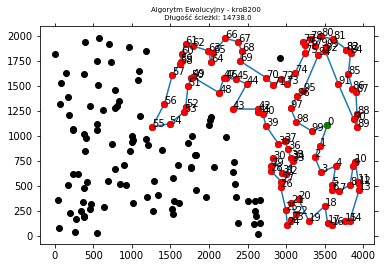

In [195]:
c = pd.read_csv("lab5krobb")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
ndm = distance_matrix.to_numpy()
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot_numpy(
    p,
    lat,
    lon,
    "Algorytm Ewolucyjny - kroB200",
    distance_matrix,
    ndm
)